In [11]:
import sys
sys.path.append("..")
import os
#GPU configuration
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.Session(config=config)
set_session(sess)

import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scripts.data_generator as data_generator
import scripts.feature_ranking as feature_ranking
import scripts.features_2d as features_2d
import scripts.ga as ga
import scripts.cnn_models as cnn_models
import scripts.ga_evaluation as ga_evaluation
from IPython import get_ipython
from keras.backend.tensorflow_backend import set_session
from sklearn.metrics.cluster import adjusted_rand_score, silhouette_score
from tqdm import tqdm
import seaborn as sns
plt.ion()
plt.show()

random_state=4
random.seed( random_state )
np.random.seed(random_state)

%load_ext autoreload
%autoreload 2

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


>> std 6
>> std 3
COV 0.4 
ARI  1.0, std 3


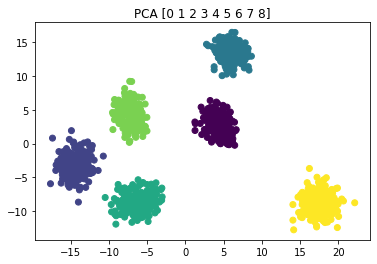

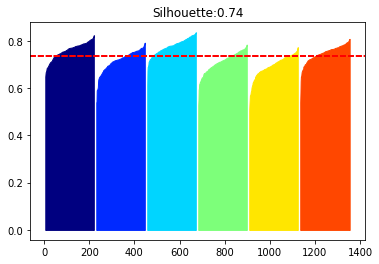

COV 0.4 
ARI  1.0, std 3


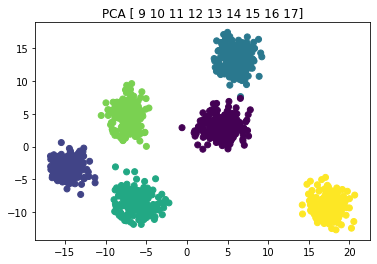

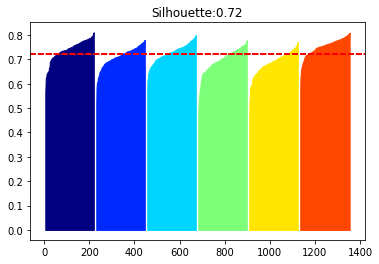

COV 0.4 
ARI  1.0, std 3


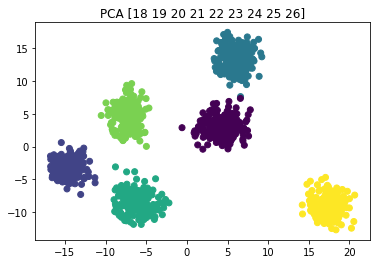

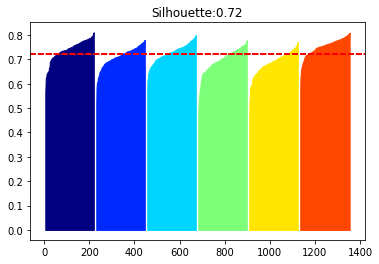

Total: (1300, 332), uniform (1300, 150) , normal (1300, 150),neg bin (1300, 0), gamma (1300, 0), moon (1300, 2), circle (1300, 2),  bimodal (1300, 0), redundat (1300, 5), outliers with uniform (1300, 0), outliers with normal (1300, 0) ,outlier binomial (1300, 0), beta features (1300, 0), 
*** Computing 1D feature ranking ...
Dispersion tests took 0.33 sec


  0%|          | 0/21 [00:00<?, ?it/s]

Entropy computation 0.5 sec
KNN computation 0.01 sec
Sorting and thresholds 0.02 sec
Performing hierarchical clustering...
Hierarchical clustering 0.05 sec
Handle redundant features 0.01 sec
Returning 1 redundant features and  15 important features
*** Optimization algorithm 
Non redundant features 331, orig size 332, nb imp : 15
adding 50 random population


 19%|█▉        | 4/21 [00:57<03:59, 14.11s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.27,"[7, 16, 25, 276]","[1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, ...",0.38,0.342757,0.72,4.0,"Counter({1: 652, 0: 648})"


adding 26 random population


 38%|███▊      | 8/21 [02:11<03:29, 16.10s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.27,"[7, 16, 25, 276]","[1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, ...",0.38,0.342757,0.72,4.0,"Counter({1: 652, 0: 648})"
1,0.24,"[4, 13, 17, 22, 26]","[2, 2, 1, 0, 1, 1, 1, 1, 0, 2, 0, 0, 1, 0, 1, ...",0.30,0.284758,0.66,5.0,"Counter({2: 436, 1: 432, 0: 432})"


adding 36 random population


 57%|█████▋    | 12/21 [03:24<02:26, 16.25s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.27,"[7, 16, 25, 276]","[1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, ...",0.38,0.342757,0.72,4.0,"Counter({1: 652, 0: 648})"
1,0.24,"[4, 13, 17, 22, 26]","[2, 2, 1, 0, 1, 1, 1, 1, 0, 2, 0, 0, 1, 0, 1, ...",0.30,0.284758,0.66,5.0,"Counter({2: 436, 1: 432, 0: 432})"
2,0.23,"[5, 6, 14, 23]","[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, ...",0.25,0.286432,0.62,4.0,"Counter({1: 1084, 0: 216})"


adding 20 random population


 76%|███████▌  | 16/21 [04:32<01:21, 16.20s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.27,"[7, 16, 25, 276]","[1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, ...",0.38,0.342757,0.72,4.0,"Counter({1: 652, 0: 648})"
1,0.24,"[4, 13, 17, 22, 26]","[2, 2, 1, 0, 1, 1, 1, 1, 0, 2, 0, 0, 1, 0, 1, ...",0.30,0.284758,0.66,5.0,"Counter({2: 436, 1: 432, 0: 432})"
2,0.23,"[5, 6, 14, 23]","[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, ...",0.25,0.286432,0.62,4.0,"Counter({1: 1084, 0: 216})"
3,0.25,"[1, 10, 19]","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.27,0.338073,0.67,3.0,"Counter({1: 1080, 0: 220})"


adding 28 random population


 95%|█████████▌| 20/21 [05:41<00:16, 16.35s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.27,"[7, 16, 25, 276]","[1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, ...",0.38,0.342757,0.72,4.0,"Counter({1: 652, 0: 648})"
1,0.24,"[4, 13, 17, 22, 26]","[2, 2, 1, 0, 1, 1, 1, 1, 0, 2, 0, 0, 1, 0, 1, ...",0.30,0.284758,0.66,5.0,"Counter({2: 436, 1: 432, 0: 432})"
2,0.23,"[5, 6, 14, 23]","[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, ...",0.25,0.286432,0.62,4.0,"Counter({1: 1084, 0: 216})"
3,0.25,"[1, 10, 19]","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.27,0.338073,0.67,3.0,"Counter({1: 1080, 0: 220})"
4,0.17,"[2, 11, 20]","[1, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, ...",0.27,0.227401,0.70,3.0,"Counter({2: 647, 0: 428, 1: 215, -1: 10})"


adding 35 random population


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 331, orig size 332, nb imp : 15
['ARCHIVE2D', 'CLOSE', 'IMP1D', 'RANDOM'] [50 25 15 10] [0.5, 0.25, 0.15, 0.1]
adding 50 random population


 19%|█▉        | 4/21 [01:28<05:46, 20.41s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.27,"[5, 7, 14, 16, 23, 25, 80]","[0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, ...",0.37,0.58,7.0,"Counter({0: 652, 1: 648})"


adding 32 random population


 38%|███▊      | 8/21 [02:53<04:06, 18.98s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.27,"[5, 7, 14, 16, 23, 25, 80]","[0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, ...",0.37,0.58,7.0,"Counter({0: 652, 1: 648})"
1,0.32,"[4, 13, 22]","[1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, ...",0.31,0.75,3.0,"Counter({1: 868, 0: 432})"


adding 31 random population


 57%|█████▋    | 12/21 [04:11<02:41, 17.95s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.27,"[5, 7, 14, 16, 23, 25, 80]","[0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, ...",0.37,0.58,7.0,"Counter({0: 652, 1: 648})"
1,0.32,"[4, 13, 22]","[1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, ...",0.31,0.75,3.0,"Counter({1: 868, 0: 432})"
2,0.32,"[8, 17, 26]","[0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...",0.32,0.76,3.0,"Counter({1: 864, 0: 436})"


adding 33 random population


 76%|███████▌  | 16/21 [05:25<01:27, 17.56s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.27,"[5, 7, 14, 16, 23, 25, 80]","[0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, ...",0.37,0.58,7.0,"Counter({0: 652, 1: 648})"
1,0.32,"[4, 13, 22]","[1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, ...",0.31,0.75,3.0,"Counter({1: 868, 0: 432})"
2,0.32,"[8, 17, 26]","[0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...",0.32,0.76,3.0,"Counter({1: 864, 0: 436})"
3,0.20,"[6, 15, 24, 331]","[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, ...",0.24,0.62,4.0,"Counter({1: 856, 0: 402, -1: 42})"


adding 27 random population


 95%|█████████▌| 20/21 [06:46<00:18, 18.59s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.27,"[5, 7, 14, 16, 23, 25, 80]","[0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, ...",0.37,0.58,7.0,"Counter({0: 652, 1: 648})"
1,0.32,"[4, 13, 22]","[1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, ...",0.31,0.75,3.0,"Counter({1: 868, 0: 432})"
2,0.32,"[8, 17, 26]","[0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...",0.32,0.76,3.0,"Counter({1: 864, 0: 436})"
3,0.20,"[6, 15, 24, 331]","[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, ...",0.24,0.62,4.0,"Counter({1: 856, 0: 402, -1: 42})"
4,0.20,"[0, 2, 3, 9, 10, 11, 12, 18, 19, 20, 21]","[1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, ...",0.33,0.53,11.0,"Counter({0: 864, 1: 220, 2: 216})"


adding 50 random population


100%|██████████| 21/21 [07:22<00:00, 21.06s/it]


,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.27,"[5, 7, 14, 16, 23, 25, 80]","[0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, ...",0.37,0.58,7.0,"Counter({0: 652, 1: 648})"
1,0.32,"[4, 13, 22]","[1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, ...",0.31,0.75,3.0,"Counter({1: 868, 0: 432})"
2,0.32,"[8, 17, 26]","[0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...",0.32,0.76,3.0,"Counter({1: 864, 0: 436})"
3,0.20,"[6, 15, 24, 331]","[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, ...",0.24,0.62,4.0,"Counter({1: 856, 0: 402, -1: 42})"
4,0.20,"[0, 2, 3, 9, 10, 11, 12, 18, 19, 20, 21]","[1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, ...",0.33,0.53,11.0,"Counter({0: 864, 1: 220, 2: 216})"


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 331, orig size 332, nb imp : 15
adding 50 random population


 19%|█▉        | 4/21 [01:34<06:29, 22.91s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.16,"[1, 6, 7, 17, 26]","[0, 1, 3, 3, 2, 2, 2, 3, 4, 1, 3, 3, 2, 4, 3, ...",0.3,0.75,5.0,"Counter({3: 432, 0: 220, 1: 216, 2: 216, 4: 216})"


adding 29 random population


 38%|███▊      | 8/21 [03:24<05:08, 23.71s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.16,"[1, 6, 7, 17, 26]","[0, 1, 3, 3, 2, 2, 2, 3, 4, 1, 3, 3, 2, 4, 3, ...",0.30,0.75,5.0,"Counter({3: 432, 0: 220, 1: 216, 2: 216, 4: 216})"
1,0.14,"[2, 4, 8, 11, 15, 16, 20, 24, 25, 331]","[0, 2, 3, 5, 1, 1, 1, 3, 4, 2, 5, 5, 1, 4, 3, ...",0.37,0.74,10.0,"Counter({0: 220, 2: 216, 3: 216, 5: 216, 1: 21..."


adding 49 random population


 57%|█████▋    | 12/21 [06:07<04:52, 32.49s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.16,"[1, 6, 7, 17, 26]","[0, 1, 3, 3, 2, 2, 2, 3, 4, 1, 3, 3, 2, 4, 3, ...",0.30,0.75,5.0,"Counter({3: 432, 0: 220, 1: 216, 2: 216, 4: 216})"
1,0.14,"[2, 4, 8, 11, 15, 16, 20, 24, 25, 331]","[0, 2, 3, 5, 1, 1, 1, 3, 4, 2, 5, 5, 1, 4, 3, ...",0.37,0.74,10.0,"Counter({0: 220, 2: 216, 3: 216, 5: 216, 1: 21..."
2,0.15,"[13, 18, 22]","[2, -1, 2, 1, 2, 2, 2, 2, 0, 2, 1, 1, 2, 0, 2,...",0.25,0.63,3.0,"Counter({2: 865, 0: 216, 1: 215, -1: 4})"


adding 48 random population


 76%|███████▌  | 16/21 [07:49<02:07, 25.42s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.16,"[1, 6, 7, 17, 26]","[0, 1, 3, 3, 2, 2, 2, 3, 4, 1, 3, 3, 2, 4, 3, ...",0.30,0.75,5.0,"Counter({3: 432, 0: 220, 1: 216, 2: 216, 4: 216})"
1,0.14,"[2, 4, 8, 11, 15, 16, 20, 24, 25, 331]","[0, 2, 3, 5, 1, 1, 1, 3, 4, 2, 5, 5, 1, 4, 3, ...",0.37,0.74,10.0,"Counter({0: 220, 2: 216, 3: 216, 5: 216, 1: 21..."
2,0.15,"[13, 18, 22]","[2, -1, 2, 1, 2, 2, 2, 2, 0, 2, 1, 1, 2, 0, 2,...",0.25,0.63,3.0,"Counter({2: 865, 0: 216, 1: 215, -1: 4})"
3,0.11,"[5, 14, 308]","[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, ...",0.17,0.52,3.0,"Counter({1: 1081, 0: 212, -1: 7})"


adding 25 random population


 95%|█████████▌| 20/21 [09:21<00:22, 22.30s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.16,"[1, 6, 7, 17, 26]","[0, 1, 3, 3, 2, 2, 2, 3, 4, 1, 3, 3, 2, 4, 3, ...",0.30,0.75,5.0,"Counter({3: 432, 0: 220, 1: 216, 2: 216, 4: 216})"
1,0.14,"[2, 4, 8, 11, 15, 16, 20, 24, 25, 331]","[0, 2, 3, 5, 1, 1, 1, 3, 4, 2, 5, 5, 1, 4, 3, ...",0.37,0.74,10.0,"Counter({0: 220, 2: 216, 3: 216, 5: 216, 1: 21..."
2,0.15,"[13, 18, 22]","[2, -1, 2, 1, 2, 2, 2, 2, 0, 2, 1, 1, 2, 0, 2,...",0.25,0.63,3.0,"Counter({2: 865, 0: 216, 1: 215, -1: 4})"
3,0.11,"[5, 14, 308]","[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, ...",0.17,0.52,3.0,"Counter({1: 1081, 0: 212, -1: 7})"
4,0.11,"[10, 19, 198]","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.15,0.51,3.0,"Counter({1: 1058, 0: 211, -1: 31})"


adding 6 random population


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 331, orig size 332, nb imp : 15
adding 50 random population


 19%|█▉        | 4/21 [01:27<06:17, 22.21s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.15,0.688168,"[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[2, 1, 5, 4, 3, 3, 3, 5, 0, 1, 4, 4, 3, 0, 5, ...",0.53,0.71,27.0,"Counter({2: 220, 1: 216, 5: 216, 4: 216, 3: 21..."


adding 50 random population


 38%|███▊      | 8/21 [04:11<06:23, 29.46s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.15,0.688168,"[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[2, 1, 5, 4, 3, 3, 3, 5, 0, 1, 4, 4, 3, 0, 5, ...",0.53,0.71,27.0,"Counter({2: 220, 1: 216, 5: 216, 4: 216, 3: 21..."
1,0.09,0.396889,"[4, 275]","[1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, ...",0.14,0.60,2.0,"Counter({1: 857, 0: 423, -1: 20})"


adding 50 random population


 57%|█████▋    | 12/21 [05:47<03:35, 23.90s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.15,0.688168,"[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[2, 1, 5, 4, 3, 3, 3, 5, 0, 1, 4, 4, 3, 0, 5, ...",0.53,0.71,27.0,"Counter({2: 220, 1: 216, 5: 216, 4: 216, 3: 21..."
1,0.09,0.396889,"[4, 275]","[1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, ...",0.14,0.60,2.0,"Counter({1: 857, 0: 423, -1: 20})"
2,0.00,0.073401,"[227, 282]","[1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1...",-0.10,0.11,2.0,"Counter({1: 938, -1: 348, 0: 14})"


adding 5 random population


 76%|███████▌  | 16/21 [07:26<02:00, 24.13s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.15,0.688168,"[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[2, 1, 5, 4, 3, 3, 3, 5, 0, 1, 4, 4, 3, 0, 5, ...",0.53,0.71,27.0,"Counter({2: 220, 1: 216, 5: 216, 4: 216, 3: 21..."
1,0.09,0.396889,"[4, 275]","[1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, ...",0.14,0.60,2.0,"Counter({1: 857, 0: 423, -1: 20})"
2,0.00,0.073401,"[227, 282]","[1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1...",-0.10,0.11,2.0,"Counter({1: 938, -1: 348, 0: 14})"
3,0.00,0.069329,"[202, 245]","[1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -...",-0.08,0.10,2.0,"Counter({1: 988, -1: 299, 0: 13})"


adding 8 random population


 95%|█████████▌| 20/21 [09:42<00:30, 30.91s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.15,0.688168,"[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[2, 1, 5, 4, 3, 3, 3, 5, 0, 1, 4, 4, 3, 0, 5, ...",0.53,0.71,27.0,"Counter({2: 220, 1: 216, 5: 216, 4: 216, 3: 21..."
1,0.09,0.396889,"[4, 275]","[1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, ...",0.14,0.60,2.0,"Counter({1: 857, 0: 423, -1: 20})"
2,0.00,0.073401,"[227, 282]","[1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1...",-0.10,0.11,2.0,"Counter({1: 938, -1: 348, 0: 14})"
3,0.00,0.069329,"[202, 245]","[1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -...",-0.08,0.10,2.0,"Counter({1: 988, -1: 299, 0: 13})"
4,0.06,0.144448,"[85, 299]","[1, -1, 1, 1, 1, 1, 1, -1, -1, -1, 0, -1, -1, ...",-0.02,0.22,2.0,"Counter({1: 479, -1: 427, 0: 394})"


adding 1 random population


100%|██████████| 21/21 [10:24<00:00, 29.75s/it]


>> EVAL DF


,experiment,true_subspace_id,pred_subspace_id,%intersect,iou,extra_features,true_subspace,pred_subspace,missed_features,ari,nmi,true_nb_clust,pred_nb_clust
0,hdbscan_ratkowsky_lance_6_pop2,0,2,0.222222,0.181818,2,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[5, 6, 14, 23]","[0, 1, 2, 3, 4, 7, 8]",0.141942,0.401286,6,2
1,hdbscan_ratkowsky_lance_6_pop2,1,1,0.222222,0.166667,3,"[9, 10, 11, 12, 13, 14, 15, 16, 17]","[4, 13, 17, 22, 26]","[9, 10, 11, 12, 14, 15, 16]",0.570496,0.760190,6,3
2,hdbscan_ratkowsky_lance_6_pop2,2,1,0.222222,0.166667,3,"[18, 19, 20, 21, 22, 23, 24, 25, 26]","[4, 13, 17, 22, 26]","[18, 19, 20, 21, 23, 24, 25]",0.570496,0.760190,6,3
3,hdbscan_adapted_ratkowsky_lance_6_pop2,0,4,0.333333,0.176471,8,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[0, 2, 3, 9, 10, 11, 12, 18, 19, 20, 21]","[1, 4, 5, 6, 7, 8]",0.334763,0.653903,6,3
4,hdbscan_adapted_ratkowsky_lance_6_pop2,1,4,0.444444,0.250000,7,"[9, 10, 11, 12, 13, 14, 15, 16, 17]","[0, 2, 3, 9, 10, 11, 12, 18, 19, 20, 21]","[13, 14, 15, 16, 17]",0.334763,0.653903,6,3
5,hdbscan_adapted_ratkowsky_lance_6_pop2,2,4,0.444444,0.250000,7,"[18, 19, 20, 21, 22, 23, 24, 25, 26]","[0, 2, 3, 9, 10, 11, 12, 18, 19, 20, 21]","[22, 23, 24, 25, 26]",0.334763,0.653903,6,3
6,hdbscan_silhouette_6_pop3,0,0,0.333333,0.272727,2,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[1, 6, 7, 17, 26]","[0, 2, 3, 4, 5, 8]",0.823933,0.931307,6,5
7,hdbscan_silhouette_6_pop3,0,1,0.333333,0.187500,7,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[2, 4, 8, 11, 15, 16, 20, 24, 25, 331]","[0, 1, 3, 5, 6, 7]",1.000000,1.000000,6,6
8,hdbscan_silhouette_6_pop3,1,1,0.333333,0.187500,7,"[9, 10, 11, 12, 13, 14, 15, 16, 17]","[2, 4, 8, 11, 15, 16, 20, 24, 25, 331]","[9, 10, 12, 13, 14, 17]",1.000000,1.000000,6,6
9,hdbscan_silhouette_6_pop3,2,1,0.333333,0.187500,7,"[18, 19, 20, 21, 22, 23, 24, 25, 26]","[2, 4, 8, 11, 15, 16, 20, 24, 25, 331]","[18, 19, 21, 22, 23, 26]",1.000000,1.000000,6,6


COV 0.4 
ARI  1.0, std 3


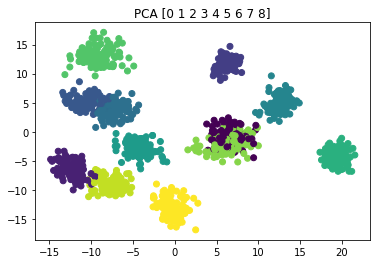

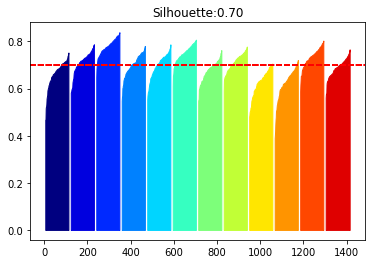

COV 0.4 
ARI  1.0, std 3


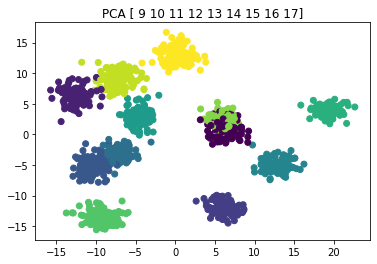

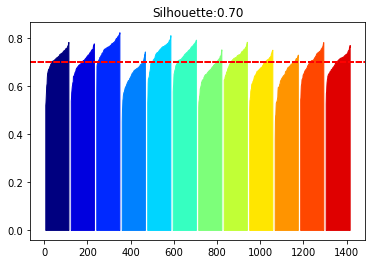

COV 0.4 
ARI  1.0, std 3


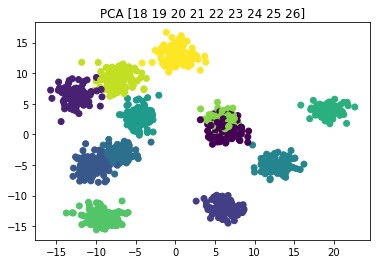

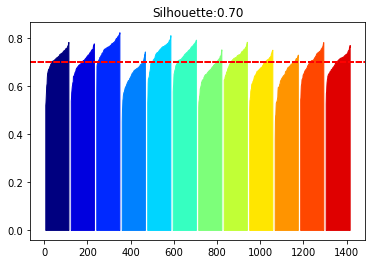

Total: (1300, 332), uniform (1300, 150) , normal (1300, 150),neg bin (1300, 0), gamma (1300, 0), moon (1300, 2), circle (1300, 2),  bimodal (1300, 0), redundat (1300, 5), outliers with uniform (1300, 0), outliers with normal (1300, 0) ,outlier binomial (1300, 0), beta features (1300, 0), 
*** Computing 1D feature ranking ...
Dispersion tests took 0.32 sec


  0%|          | 0/21 [00:00<?, ?it/s]

Entropy computation 0.69 sec
KNN computation 0.01 sec
Sorting and thresholds 0.02 sec
Performing hierarchical clustering...
Hierarchical clustering 0.06 sec
Handle redundant features 0.02 sec
Returning 0 redundant features and  13 important features
*** Optimization algorithm 
Non redundant features 332, orig size 332, nb imp : 13
adding 50 random population


 19%|█▉        | 4/21 [01:23<05:47, 20.42s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.26,"[7, 16, 25, 44]","[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, ...",0.28,0.321796,0.56,4.0,"Counter({1: 652, 0: 648})"


adding 24 random population


 38%|███▊      | 8/21 [02:53<04:34, 21.13s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.26,"[7, 16, 25, 44]","[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, ...",0.28,0.321796,0.56,4.0,"Counter({1: 652, 0: 648})"
1,0.23,"[1, 4, 10, 13, 19, 22]","[0, 1, 0, 1, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, ...",0.29,0.269404,0.60,6.0,"Counter({0: 540, 1: 432, 2: 328})"


adding 37 random population


 57%|█████▋    | 12/21 [04:22<03:09, 21.06s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.26,"[7, 16, 25, 44]","[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, ...",0.28,0.321796,0.56,4.0,"Counter({1: 652, 0: 648})"
1,0.23,"[1, 4, 10, 13, 19, 22]","[0, 1, 0, 1, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, ...",0.29,0.269404,0.60,6.0,"Counter({0: 540, 1: 432, 2: 328})"
2,0.21,"[5, 8, 14, 23, 26]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ...",0.23,0.249253,0.51,5.0,"Counter({0: 976, 1: 324})"


adding 42 random population


 76%|███████▌  | 16/21 [05:50<01:46, 21.32s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.26,"[7, 16, 25, 44]","[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, ...",0.28,0.321796,0.56,4.0,"Counter({1: 652, 0: 648})"
1,0.23,"[1, 4, 10, 13, 19, 22]","[0, 1, 0, 1, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, ...",0.29,0.269404,0.60,6.0,"Counter({0: 540, 1: 432, 2: 328})"
2,0.21,"[5, 8, 14, 23, 26]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ...",0.23,0.249253,0.51,5.0,"Counter({0: 976, 1: 324})"
3,0.13,"[3, 12, 21]","[0, -1, 2, 1, 1, 2, 2, 2, 2, 2, -1, 2, 2, 2, 2...",0.12,0.174289,0.51,3.0,"Counter({2: 814, 1: 307, -1: 112, 0: 67})"


adding 16 random population


 95%|█████████▌| 20/21 [07:48<00:26, 26.68s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.26,"[7, 16, 25, 44]","[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, ...",0.28,0.321796,0.56,4.0,"Counter({1: 652, 0: 648})"
1,0.23,"[1, 4, 10, 13, 19, 22]","[0, 1, 0, 1, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, ...",0.29,0.269404,0.60,6.0,"Counter({0: 540, 1: 432, 2: 328})"
2,0.21,"[5, 8, 14, 23, 26]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ...",0.23,0.249253,0.51,5.0,"Counter({0: 976, 1: 324})"
3,0.13,"[3, 12, 21]","[0, -1, 2, 1, 1, 2, 2, 2, 2, 2, -1, 2, 2, 2, 2...",0.12,0.174289,0.51,3.0,"Counter({2: 814, 1: 307, -1: 112, 0: 67})"
4,0.14,"[6, 15, 24, 322, 329]","[0, 0, 1, 0, 1, 0, -1, 1, 0, 0, -1, 0, 0, 1, 1...",0.03,0.164065,0.31,5.0,"Counter({1: 512, 0: 447, -1: 341})"


adding 45 random population


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 332, orig size 332, nb imp : 13
['ARCHIVE2D', 'CLOSE', 'IMP1D', 'RANDOM'] [50 25 15 10] [0.5, 0.25, 0.15, 0.1]
adding 50 random population


 19%|█▉        | 4/21 [01:17<05:33, 19.64s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.31,"[7, 14, 16, 25]","[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, ...",0.34,0.67,4.0,"Counter({1: 652, 0: 648})"


adding 25 random population


 38%|███▊      | 8/21 [02:50<04:29, 20.72s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.31,"[7, 14, 16, 25]","[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, ...",0.34,0.67,4.0,"Counter({1: 652, 0: 648})"
1,0.20,"[1, 4, 19]","[0, 1, 0, 1, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, ...",0.22,0.59,3.0,"Counter({0: 540, 1: 432, 2: 328})"


adding 37 random population


 57%|█████▋    | 12/21 [04:28<03:14, 21.63s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.31,"[7, 14, 16, 25]","[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, ...",0.34,0.67,4.0,"Counter({1: 652, 0: 648})"
1,0.20,"[1, 4, 19]","[0, 1, 0, 1, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, ...",0.22,0.59,3.0,"Counter({0: 540, 1: 432, 2: 328})"
2,0.16,"[6, 15, 24, 176, 329]","[0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, ...",0.10,0.34,5.0,"Counter({1: 634, 0: 540, -1: 126})"


adding 9 random population


 76%|███████▌  | 16/21 [06:10<01:58, 23.62s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.31,"[7, 14, 16, 25]","[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, ...",0.34,0.67,4.0,"Counter({1: 652, 0: 648})"
1,0.20,"[1, 4, 19]","[0, 1, 0, 1, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, ...",0.22,0.59,3.0,"Counter({0: 540, 1: 432, 2: 328})"
2,0.16,"[6, 15, 24, 176, 329]","[0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, ...",0.10,0.34,5.0,"Counter({1: 634, 0: 540, -1: 126})"
3,0.15,"[0, 9, 11, 17, 18, 26, 76]","[2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, ...",0.22,0.35,7.0,"Counter({0: 868, 2: 324, 1: 108})"


adding 42 random population


 95%|█████████▌| 20/21 [07:24<00:17, 17.91s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.31,"[7, 14, 16, 25]","[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, ...",0.34,0.67,4.0,"Counter({1: 652, 0: 648})"
1,0.20,"[1, 4, 19]","[0, 1, 0, 1, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, ...",0.22,0.59,3.0,"Counter({0: 540, 1: 432, 2: 328})"
2,0.16,"[6, 15, 24, 176, 329]","[0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, ...",0.10,0.34,5.0,"Counter({1: 634, 0: 540, -1: 126})"
3,0.15,"[0, 9, 11, 17, 18, 26, 76]","[2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, ...",0.22,0.35,7.0,"Counter({0: 868, 2: 324, 1: 108})"
4,0.13,"[2, 13, 20, 22, 174]","[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, ...",0.14,0.36,5.0,"Counter({1: 633, 0: 324, 2: 310, -1: 33})"


adding 29 random population


100%|██████████| 21/21 [07:50<00:00, 22.40s/it]


,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.31,"[7, 14, 16, 25]","[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, ...",0.34,0.67,4.0,"Counter({1: 652, 0: 648})"
1,0.20,"[1, 4, 19]","[0, 1, 0, 1, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, ...",0.22,0.59,3.0,"Counter({0: 540, 1: 432, 2: 328})"
2,0.16,"[6, 15, 24, 176, 329]","[0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, ...",0.10,0.34,5.0,"Counter({1: 634, 0: 540, -1: 126})"
3,0.15,"[0, 9, 11, 17, 18, 26, 76]","[2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, ...",0.22,0.35,7.0,"Counter({0: 868, 2: 324, 1: 108})"
4,0.13,"[2, 13, 20, 22, 174]","[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, ...",0.14,0.36,5.0,"Counter({1: 633, 0: 324, 2: 310, -1: 33})"


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 332, orig size 332, nb imp : 13
adding 50 random population


 19%|█▉        | 4/21 [01:20<05:30, 19.44s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.18,"[7, 16, 25]","[0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, ...",0.3,0.71,3.0,"Counter({0: 648, 2: 313, 1: 308, -1: 31})"


adding 26 random population


 38%|███▊      | 8/21 [03:01<04:49, 22.25s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.18,"[7, 16, 25]","[0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, ...",0.30,0.71,3.0,"Counter({0: 648, 2: 313, 1: 308, -1: 31})"
1,0.17,"[4, 22]","[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, ...",0.21,0.66,2.0,"Counter({1: 966, 0: 321, -1: 13})"


adding 14 random population


 57%|█████▋    | 12/21 [04:41<03:35, 23.93s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.18,"[7, 16, 25]","[0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, ...",0.30,0.71,3.0,"Counter({0: 648, 2: 313, 1: 308, -1: 31})"
1,0.17,"[4, 22]","[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, ...",0.21,0.66,2.0,"Counter({1: 966, 0: 321, -1: 13})"
2,0.07,"[0, 2, 3, 5, 8, 9, 10, 11, 13, 14, 17, 18, 19,...","[3, 10, 9, 10, 5, 4, 8, 6, 4, 4, 3, 0, 0, 9, 8...",0.30,0.66,18.0,"Counter({6: 112, 3: 108, 10: 108, 9: 108, 5: 1..."


adding 49 random population


 76%|███████▌  | 16/21 [07:03<02:14, 26.91s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.18,"[7, 16, 25]","[0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, ...",0.30,0.71,3.0,"Counter({0: 648, 2: 313, 1: 308, -1: 31})"
1,0.17,"[4, 22]","[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, ...",0.21,0.66,2.0,"Counter({1: 966, 0: 321, -1: 13})"
2,0.07,"[0, 2, 3, 5, 8, 9, 10, 11, 13, 14, 17, 18, 19,...","[3, 10, 9, 10, 5, 4, 8, 6, 4, 4, 3, 0, 0, 9, 8...",0.30,0.66,18.0,"Counter({6: 112, 3: 108, 10: 108, 9: 108, 5: 1..."
3,0.13,"[1, 15]","[2, 0, 2, 0, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, ...",0.19,0.56,2.0,"Counter({2: 644, 0: 429, 1: 215, -1: 12})"


adding 50 random population


 95%|█████████▌| 20/21 [08:33<00:22, 22.21s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.18,"[7, 16, 25]","[0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, ...",0.30,0.71,3.0,"Counter({0: 648, 2: 313, 1: 308, -1: 31})"
1,0.17,"[4, 22]","[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, ...",0.21,0.66,2.0,"Counter({1: 966, 0: 321, -1: 13})"
2,0.07,"[0, 2, 3, 5, 8, 9, 10, 11, 13, 14, 17, 18, 19,...","[3, 10, 9, 10, 5, 4, 8, 6, 4, 4, 3, 0, 0, 9, 8...",0.30,0.66,18.0,"Counter({6: 112, 3: 108, 10: 108, 9: 108, 5: 1..."
3,0.13,"[1, 15]","[2, 0, 2, 0, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, ...",0.19,0.56,2.0,"Counter({2: 644, 0: 429, 1: 215, -1: 12})"
4,0.08,"[6, 210]","[0, -1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,...",0.06,0.45,2.0,"Counter({1: 644, 0: 566, -1: 90})"


adding 34 random population


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 332, orig size 332, nb imp : 13
adding 50 random population


 19%|█▉        | 4/21 [01:26<05:55, 20.92s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.08,0.666068,"[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14...","[6, 9, 10, 9, 7, 4, 8, 5, 4, 4, 6, 2, 2, 10, 8...",0.36,0.69,24.0,"Counter({5: 112, 6: 108, 9: 108, 10: 108, 7: 1..."


adding 49 random population


 38%|███▊      | 8/21 [03:37<05:33, 25.64s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.08,0.666068,"[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14...","[6, 9, 10, 9, 7, 4, 8, 5, 4, 4, 6, 2, 2, 10, 8...",0.36,0.69,24.0,"Counter({5: 112, 6: 108, 9: 108, 10: 108, 7: 1..."
1,0.13,0.408148,"[6, 261, 329]","[0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, ...",0.15,0.54,3.0,"Counter({1: 691, 0: 587, -1: 22})"


adding 27 random population


 57%|█████▋    | 12/21 [05:32<03:59, 26.66s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.08,0.666068,"[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14...","[6, 9, 10, 9, 7, 4, 8, 5, 4, 4, 6, 2, 2, 10, 8...",0.36,0.69,24.0,"Counter({5: 112, 6: 108, 9: 108, 10: 108, 7: 1..."
1,0.13,0.408148,"[6, 261, 329]","[0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, ...",0.15,0.54,3.0,"Counter({1: 691, 0: 587, -1: 22})"
2,0.12,0.324565,"[15, 24, 243]","[0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, -1,...",0.09,0.43,3.0,"Counter({1: 648, 0: 515, -1: 137})"


adding 27 random population


 76%|███████▌  | 16/21 [07:55<02:34, 30.84s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.08,0.666068,"[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14...","[6, 9, 10, 9, 7, 4, 8, 5, 4, 4, 6, 2, 2, 10, 8...",0.36,0.69,24.0,"Counter({5: 112, 6: 108, 9: 108, 10: 108, 7: 1..."
1,0.13,0.408148,"[6, 261, 329]","[0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, ...",0.15,0.54,3.0,"Counter({1: 691, 0: 587, -1: 22})"
2,0.12,0.324565,"[15, 24, 243]","[0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, -1,...",0.09,0.43,3.0,"Counter({1: 648, 0: 515, -1: 137})"
3,0.00,0.101576,"[179, 317]","[1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",-0.10,0.15,2.0,"Counter({1: 1075, -1: 214, 0: 11})"


adding 2 random population


 95%|█████████▌| 20/21 [09:55<00:28, 28.10s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.08,0.666068,"[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14...","[6, 9, 10, 9, 7, 4, 8, 5, 4, 4, 6, 2, 2, 10, 8...",0.36,0.69,24.0,"Counter({5: 112, 6: 108, 9: 108, 10: 108, 7: 1..."
1,0.13,0.408148,"[6, 261, 329]","[0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, ...",0.15,0.54,3.0,"Counter({1: 691, 0: 587, -1: 22})"
2,0.12,0.324565,"[15, 24, 243]","[0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, -1,...",0.09,0.43,3.0,"Counter({1: 648, 0: 515, -1: 137})"
3,0.00,0.101576,"[179, 317]","[1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",-0.10,0.15,2.0,"Counter({1: 1075, -1: 214, 0: 11})"
4,0.01,0.067184,"[241, 248]","[0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",-0.10,0.10,2.0,"Counter({0: 969, -1: 318, 1: 13})"


adding 2 random population


100%|██████████| 21/21 [10:34<00:00, 30.24s/it]


>> EVAL DF


,experiment,true_subspace_id,pred_subspace_id,%intersect,iou,extra_features,true_subspace,pred_subspace,missed_features,ari,nmi,true_nb_clust,pred_nb_clust
0,hdbscan_ratkowsky_lance_12_pop2,0,1,0.222222,0.153846,4,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[1, 4, 10, 13, 19, 22]","[0, 2, 3, 5, 6, 7, 8]",0.290847,0.605325,12,3
1,hdbscan_ratkowsky_lance_12_pop2,0,2,0.222222,0.166667,3,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[5, 8, 14, 23, 26]","[0, 1, 2, 3, 4, 6, 7]",0.102353,0.368631,12,2
2,hdbscan_ratkowsky_lance_12_pop2,1,1,0.222222,0.153846,4,"[9, 10, 11, 12, 13, 14, 15, 16, 17]","[1, 4, 10, 13, 19, 22]","[9, 11, 12, 14, 15, 16, 17]",0.290847,0.605325,12,3
3,hdbscan_ratkowsky_lance_12_pop2,2,1,0.222222,0.153846,4,"[18, 19, 20, 21, 22, 23, 24, 25, 26]","[1, 4, 10, 13, 19, 22]","[18, 20, 21, 23, 24, 25, 26]",0.290847,0.605325,12,3
4,hdbscan_ratkowsky_lance_12_pop2,2,2,0.222222,0.166667,3,"[18, 19, 20, 21, 22, 23, 24, 25, 26]","[5, 8, 14, 23, 26]","[18, 19, 20, 21, 22, 24, 25]",0.102353,0.368631,12,2
5,hdbscan_adapted_ratkowsky_lance_12_pop2,0,1,0.222222,0.200000,1,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[1, 4, 19]","[0, 2, 3, 5, 6, 7, 8]",0.290847,0.605325,12,3
6,hdbscan_adapted_ratkowsky_lance_12_pop2,1,3,0.333333,0.230769,4,"[9, 10, 11, 12, 13, 14, 15, 16, 17]","[0, 9, 11, 17, 18, 26, 76]","[10, 12, 13, 14, 15, 16]",0.156712,0.497453,12,3
7,hdbscan_adapted_ratkowsky_lance_12_pop2,2,3,0.222222,0.142857,5,"[18, 19, 20, 21, 22, 23, 24, 25, 26]","[0, 9, 11, 17, 18, 26, 76]","[19, 20, 21, 22, 23, 24, 25]",0.156712,0.497453,12,3
8,hdbscan_adapted_ratkowsky_lance_12_pop2,2,4,0.222222,0.166667,3,"[18, 19, 20, 21, 22, 23, 24, 25, 26]","[2, 13, 20, 22, 174]","[18, 19, 21, 23, 24, 25, 26]",0.258882,0.566618,12,4
9,hdbscan_silhouette_12_pop3,0,2,0.555556,0.227273,13,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[0, 2, 3, 5, 8, 9, 10, 11, 13, 14, 17, 18, 19,...","[1, 4, 6, 7]",1.000000,1.000000,12,12


>> std 1
COV 0.2 
ARI  1.0, std 1


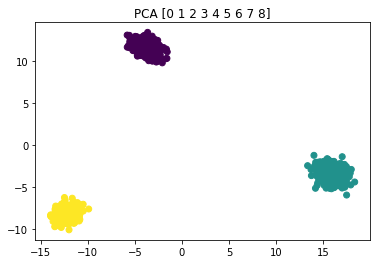

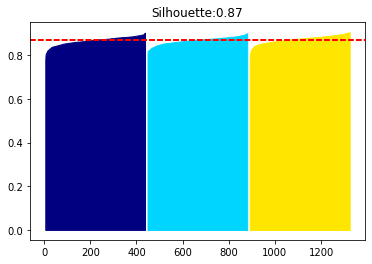

COV 0.2 
ARI  1.0, std 1


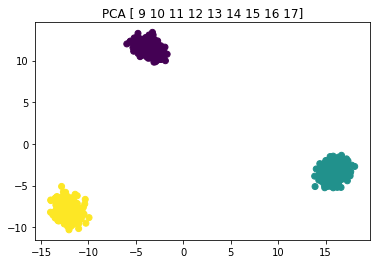

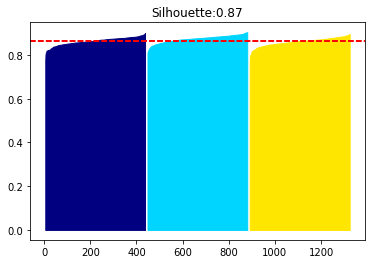

COV 0.2 
ARI  1.0, std 1


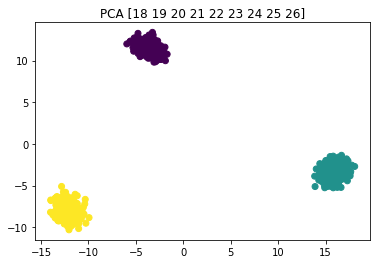

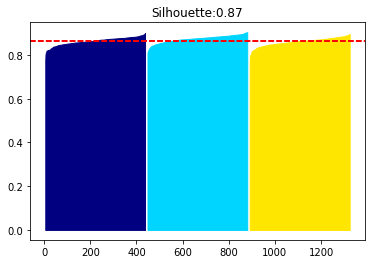

Total: (1300, 332), uniform (1300, 150) , normal (1300, 150),neg bin (1300, 0), gamma (1300, 0), moon (1300, 2), circle (1300, 2),  bimodal (1300, 0), redundat (1300, 5), outliers with uniform (1300, 0), outliers with normal (1300, 0) ,outlier binomial (1300, 0), beta features (1300, 0), 
*** Computing 1D feature ranking ...
Dispersion tests took 0.41 sec


  0%|          | 0/21 [00:00<?, ?it/s]

Entropy computation 0.71 sec
KNN computation 0.01 sec
Sorting and thresholds 0.02 sec
Performing hierarchical clustering...
Hierarchical clustering 0.05 sec
Handle redundant features 0.02 sec
Returning 0 redundant features and  17 important features
*** Optimization algorithm 
Non redundant features 332, orig size 332, nb imp : 17
adding 50 random population


 19%|█▉        | 4/21 [01:05<04:31, 15.94s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.41,"[4, 5, 13, 14, 22, 23]","[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, ...",0.7,0.480664,0.88,6.0,"Counter({1: 867, 0: 433})"


adding 33 random population


 38%|███▊      | 8/21 [02:30<03:57, 18.24s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.41,"[4, 5, 13, 14, 22, 23]","[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, ...",0.70,0.480664,0.88,6.0,"Counter({1: 867, 0: 433})"
1,0.42,"[2, 8, 11, 12, 17, 20, 21, 26]","[0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, ...",0.79,0.473188,0.86,8.0,"Counter({0: 866, 1: 434})"


adding 47 random population


 57%|█████▋    | 12/21 [04:02<02:56, 19.56s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.41,"[4, 5, 13, 14, 22, 23]","[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, ...",0.70,0.480664,0.88,6.0,"Counter({1: 867, 0: 433})"
1,0.42,"[2, 8, 11, 12, 17, 20, 21, 26]","[0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, ...",0.79,0.473188,0.86,8.0,"Counter({0: 866, 1: 434})"
2,0.36,"[6, 15, 24]","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, ...",0.48,0.476291,0.88,3.0,"Counter({0: 867, 1: 433})"


adding 33 random population


 76%|███████▌  | 16/21 [05:33<01:50, 22.01s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.41,"[4, 5, 13, 14, 22, 23]","[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, ...",0.70,0.480664,0.88,6.0,"Counter({1: 867, 0: 433})"
1,0.42,"[2, 8, 11, 12, 17, 20, 21, 26]","[0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, ...",0.79,0.473188,0.86,8.0,"Counter({0: 866, 1: 434})"
2,0.36,"[6, 15, 24]","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, ...",0.48,0.476291,0.88,3.0,"Counter({0: 867, 1: 433})"
3,0.28,"[0, 7, 9, 16, 18, 25]","[0, 2, 2, 0, 1, 1, 1, 1, 0, 1, 0, 2, 2, 1, 2, ...",0.52,0.324194,0.83,6.0,"Counter({1: 434, 0: 433, 2: 433})"


adding 50 random population


 95%|█████████▌| 20/21 [07:38<00:27, 27.40s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.41,"[4, 5, 13, 14, 22, 23]","[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, ...",0.70,0.480664,0.88,6.0,"Counter({1: 867, 0: 433})"
1,0.42,"[2, 8, 11, 12, 17, 20, 21, 26]","[0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, ...",0.79,0.473188,0.86,8.0,"Counter({0: 866, 1: 434})"
2,0.36,"[6, 15, 24]","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, ...",0.48,0.476291,0.88,3.0,"Counter({0: 867, 1: 433})"
3,0.28,"[0, 7, 9, 16, 18, 25]","[0, 2, 2, 0, 1, 1, 1, 1, 0, 1, 0, 2, 2, 1, 2, ...",0.52,0.324194,0.83,6.0,"Counter({1: 434, 0: 433, 2: 433})"
4,0.04,"[1, 190]","[-1, 2, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 2, -...",-0.02,0.061046,0.13,2.0,"Counter({2: 461, 1: 416, -1: 413, 0: 10})"


adding 31 random population


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 332, orig size 332, nb imp : 17
['ARCHIVE2D', 'CLOSE', 'IMP1D', 'RANDOM'] [50 25 15 10] [0.5, 0.25, 0.15, 0.1]
adding 50 random population


 19%|█▉        | 4/21 [01:37<07:06, 25.06s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.42,"[0, 2, 3, 8, 11, 12, 17, 20, 21, 26]","[1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, ...",0.83,0.84,10.0,"Counter({1: 866, 0: 434})"


adding 33 random population


 38%|███▊      | 8/21 [03:32<05:09, 23.80s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.42,"[0, 2, 3, 8, 11, 12, 17, 20, 21, 26]","[1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, ...",0.83,0.84,10.0,"Counter({1: 866, 0: 434})"
1,0.41,"[4, 5, 13, 14, 22, 23]","[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, ...",0.70,0.88,6.0,"Counter({1: 867, 0: 433})"


adding 49 random population


 57%|█████▋    | 12/21 [05:03<03:11, 21.25s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.42,"[0, 2, 3, 8, 11, 12, 17, 20, 21, 26]","[1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, ...",0.83,0.84,10.0,"Counter({1: 866, 0: 434})"
1,0.41,"[4, 5, 13, 14, 22, 23]","[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, ...",0.70,0.88,6.0,"Counter({1: 867, 0: 433})"
2,0.36,"[6, 15, 24]","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, ...",0.48,0.88,3.0,"Counter({0: 867, 1: 433})"


adding 41 random population


 76%|███████▌  | 16/21 [06:29<01:43, 20.68s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.42,"[0, 2, 3, 8, 11, 12, 17, 20, 21, 26]","[1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, ...",0.83,0.84,10.0,"Counter({1: 866, 0: 434})"
1,0.41,"[4, 5, 13, 14, 22, 23]","[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, ...",0.70,0.88,6.0,"Counter({1: 867, 0: 433})"
2,0.36,"[6, 15, 24]","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, ...",0.48,0.88,3.0,"Counter({0: 867, 1: 433})"
3,0.25,"[1, 7, 10, 16, 19, 25]","[0, 1, 1, 0, 2, 2, 2, 2, 0, 2, 0, 1, 1, 2, 1, ...",0.42,0.76,6.0,"Counter({2: 434, 0: 433, 1: 433})"


adding 50 random population


 95%|█████████▌| 20/21 [07:35<00:15, 15.59s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.42,"[0, 2, 3, 8, 11, 12, 17, 20, 21, 26]","[1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, ...",0.83,0.84,10.0,"Counter({1: 866, 0: 434})"
1,0.41,"[4, 5, 13, 14, 22, 23]","[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, ...",0.70,0.88,6.0,"Counter({1: 867, 0: 433})"
2,0.36,"[6, 15, 24]","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, ...",0.48,0.88,3.0,"Counter({0: 867, 1: 433})"
3,0.25,"[1, 7, 10, 16, 19, 25]","[0, 1, 1, 0, 2, 2, 2, 2, 0, 2, 0, 1, 1, 2, 1, ...",0.42,0.76,6.0,"Counter({2: 434, 0: 433, 1: 433})"
4,0.20,"[9, 18, 27]","[1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, ...",0.19,0.47,3.0,"Counter({1: 867, 0: 433})"


adding 50 random population


100%|██████████| 21/21 [07:59<00:00, 22.82s/it]


,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.42,"[0, 2, 3, 8, 11, 12, 17, 20, 21, 26]","[1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, ...",0.83,0.84,10.0,"Counter({1: 866, 0: 434})"
1,0.41,"[4, 5, 13, 14, 22, 23]","[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, ...",0.70,0.88,6.0,"Counter({1: 867, 0: 433})"
2,0.36,"[6, 15, 24]","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, ...",0.48,0.88,3.0,"Counter({0: 867, 1: 433})"
3,0.25,"[1, 7, 10, 16, 19, 25]","[0, 1, 1, 0, 2, 2, 2, 2, 0, 2, 0, 1, 1, 2, 1, ...",0.42,0.76,6.0,"Counter({2: 434, 0: 433, 1: 433})"
4,0.20,"[9, 18, 27]","[1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, ...",0.19,0.47,3.0,"Counter({1: 867, 0: 433})"


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 332, orig size 332, nb imp : 17
adding 50 random population


 19%|█▉        | 4/21 [01:43<07:20, 25.91s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.29,"[5, 8, 14, 16, 17, 23, 24, 26]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.72,0.9,8.0,"Counter({0: 434, 1: 433, 2: 433})"


adding 41 random population


 38%|███▊      | 8/21 [04:02<06:20, 29.30s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.29,"[5, 8, 14, 16, 17, 23, 24, 26]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.72,0.90,8.0,"Counter({0: 434, 1: 433, 2: 433})"
1,0.28,"[2, 6, 7, 11, 15, 20, 25]","[1, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 0, 0, 2, 0, ...",0.58,0.86,7.0,"Counter({2: 434, 1: 433, 0: 433})"


adding 41 random population


 57%|█████▋    | 12/21 [05:50<03:43, 24.81s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.29,"[5, 8, 14, 16, 17, 23, 24, 26]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.72,0.90,8.0,"Counter({0: 434, 1: 433, 2: 433})"
1,0.28,"[2, 6, 7, 11, 15, 20, 25]","[1, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 0, 0, 2, 0, ...",0.58,0.86,7.0,"Counter({2: 434, 1: 433, 0: 433})"
2,0.36,"[4, 13, 22]","[1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...",0.46,0.89,3.0,"Counter({0: 867, 1: 433})"


adding 49 random population


 76%|███████▌  | 16/21 [07:25<01:53, 22.62s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.29,"[5, 8, 14, 16, 17, 23, 24, 26]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.72,0.90,8.0,"Counter({0: 434, 1: 433, 2: 433})"
1,0.28,"[2, 6, 7, 11, 15, 20, 25]","[1, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 0, 0, 2, 0, ...",0.58,0.86,7.0,"Counter({2: 434, 1: 433, 0: 433})"
2,0.36,"[4, 13, 22]","[1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...",0.46,0.89,3.0,"Counter({0: 867, 1: 433})"
3,0.14,"[0, 9, 18, 209]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.26,0.61,4.0,"Counter({0: 433, 1: 430, 2: 427, -1: 10})"


adding 50 random population


 95%|█████████▌| 20/21 [08:58<00:21, 21.93s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.29,"[5, 8, 14, 16, 17, 23, 24, 26]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.72,0.90,8.0,"Counter({0: 434, 1: 433, 2: 433})"
1,0.28,"[2, 6, 7, 11, 15, 20, 25]","[1, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 0, 0, 2, 0, ...",0.58,0.86,7.0,"Counter({2: 434, 1: 433, 0: 433})"
2,0.36,"[4, 13, 22]","[1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...",0.46,0.89,3.0,"Counter({0: 867, 1: 433})"
3,0.14,"[0, 9, 18, 209]","[1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, ...",0.26,0.61,4.0,"Counter({0: 433, 1: 430, 2: 427, -1: 10})"
4,0.34,"[3, 12, 21]","[0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, ...",0.37,0.82,3.0,"Counter({0: 866, 1: 434})"


adding 46 random population


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 332, orig size 332, nb imp : 17
adding 50 random population


 19%|█▉        | 4/21 [01:19<05:31, 19.50s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.31,0.818292,"[0, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 1...","[0, 1, 1, 0, 2, 2, 2, 2, 0, 2, 0, 1, 1, 2, 1, ...",1.05,0.85,24.0,"Counter({2: 434, 0: 433, 1: 433})"


adding 50 random population


 38%|███▊      | 8/21 [03:26<05:23, 24.91s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.31,0.818292,"[0, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 1...","[0, 1, 1, 0, 2, 2, 2, 2, 0, 2, 0, 1, 1, 2, 1, ...",1.05,0.85,24.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.00,0.117858,"[187, 190]","[-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, ...",-0.10,0.18,2.0,"Counter({1: 1042, -1: 248, 0: 10})"


adding 3 random population


 57%|█████▋    | 12/21 [04:51<03:09, 21.07s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.31,0.818292,"[0, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 1...","[0, 1, 1, 0, 2, 2, 2, 2, 0, 2, 0, 1, 1, 2, 1, ...",1.05,0.85,24.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.00,0.117858,"[187, 190]","[-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, ...",-0.10,0.18,2.0,"Counter({1: 1042, -1: 248, 0: 10})"
2,0.12,0.416230,"[1, 3, 242]","[0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, ...",0.18,0.55,3.0,"Counter({0: 862, 1: 430, -1: 8})"


adding 26 random population


 76%|███████▌  | 16/21 [06:37<02:02, 24.55s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.31,0.818292,"[0, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 1...","[0, 1, 1, 0, 2, 2, 2, 2, 0, 2, 0, 1, 1, 2, 1, ...",1.05,0.85,24.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.00,0.117858,"[187, 190]","[-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, ...",-0.10,0.18,2.0,"Counter({1: 1042, -1: 248, 0: 10})"
2,0.12,0.416230,"[1, 3, 242]","[0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, ...",0.18,0.55,3.0,"Counter({0: 862, 1: 430, -1: 8})"
3,0.01,0.088593,"[298, 314]","[-1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...",-0.10,0.13,2.0,"Counter({1: 1034, -1: 256, 0: 10})"


adding 19 random population


 95%|█████████▌| 20/21 [08:40<00:27, 27.72s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.31,0.818292,"[0, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 1...","[0, 1, 1, 0, 2, 2, 2, 2, 0, 2, 0, 1, 1, 2, 1, ...",1.05,0.85,24.0,"Counter({2: 434, 0: 433, 1: 433})"
1,0.00,0.117858,"[187, 190]","[-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, ...",-0.10,0.18,2.0,"Counter({1: 1042, -1: 248, 0: 10})"
2,0.12,0.416230,"[1, 3, 242]","[0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, ...",0.18,0.55,3.0,"Counter({0: 862, 1: 430, -1: 8})"
3,0.01,0.088593,"[298, 314]","[-1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...",-0.10,0.13,2.0,"Counter({1: 1034, -1: 256, 0: 10})"
4,0.02,0.080937,"[198, 330]","[0, -1, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, ...",-0.08,0.12,2.0,"Counter({0: 857, -1: 351, 1: 92})"


adding 2 random population


100%|██████████| 21/21 [09:12<00:00, 26.31s/it]


>> EVAL DF


,experiment,true_subspace_id,pred_subspace_id,%intersect,iou,extra_features,true_subspace,pred_subspace,missed_features,ari,nmi,true_nb_clust,pred_nb_clust
0,hdbscan_ratkowsky_lance_3_pop2,0,0,0.222222,0.153846,4,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[4, 5, 13, 14, 22, 23]","[0, 1, 2, 3, 6, 7, 8]",0.570769,0.733551,3,2
1,hdbscan_ratkowsky_lance_3_pop2,0,1,0.222222,0.133333,6,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[2, 8, 11, 12, 17, 20, 21, 26]","[0, 1, 3, 4, 5, 6, 7]",0.571616,0.733940,3,2
2,hdbscan_ratkowsky_lance_3_pop2,0,3,0.222222,0.153846,4,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[0, 7, 9, 16, 18, 25]","[1, 2, 3, 4, 5, 6, 8]",1.000000,1.000000,3,3
3,hdbscan_ratkowsky_lance_3_pop2,1,1,0.333333,0.214286,5,"[9, 10, 11, 12, 13, 14, 15, 16, 17]","[2, 8, 11, 12, 17, 20, 21, 26]","[9, 10, 13, 14, 15, 16]",0.571616,0.733940,3,2
4,hdbscan_ratkowsky_lance_3_pop2,2,1,0.333333,0.214286,5,"[18, 19, 20, 21, 22, 23, 24, 25, 26]","[2, 8, 11, 12, 17, 20, 21, 26]","[18, 19, 22, 23, 24, 25]",0.571616,0.733940,3,2
5,hdbscan_adapted_ratkowsky_lance_3_pop2,0,0,0.444444,0.266667,6,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[0, 2, 3, 8, 11, 12, 17, 20, 21, 26]","[1, 4, 5, 6, 7]",0.571616,0.733940,3,2
6,hdbscan_adapted_ratkowsky_lance_3_pop2,1,0,0.333333,0.187500,7,"[9, 10, 11, 12, 13, 14, 15, 16, 17]","[0, 2, 3, 8, 11, 12, 17, 20, 21, 26]","[9, 10, 13, 14, 15, 16]",0.571616,0.733940,3,2
7,hdbscan_adapted_ratkowsky_lance_3_pop2,2,0,0.333333,0.187500,7,"[18, 19, 20, 21, 22, 23, 24, 25, 26]","[0, 2, 3, 8, 11, 12, 17, 20, 21, 26]","[18, 19, 22, 23, 24, 25]",0.571616,0.733940,3,2
8,hdbscan_silhouette_3_pop3,0,1,0.333333,0.230769,4,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[2, 6, 7, 11, 15, 20, 25]","[0, 1, 3, 4, 5, 8]",1.000000,1.000000,3,3
9,hdbscan_silhouette_3_pop3,1,0,0.333333,0.214286,5,"[9, 10, 11, 12, 13, 14, 15, 16, 17]","[5, 8, 14, 16, 17, 23, 24, 26]","[9, 10, 11, 12, 13, 15]",1.000000,1.000000,3,3


COV 0.2 
ARI  1.0, std 1


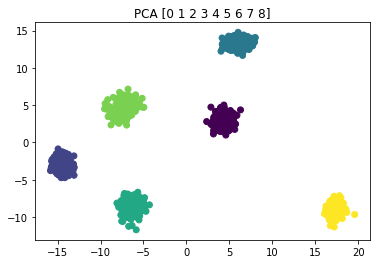

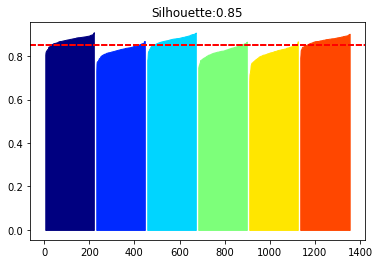

COV 0.2 
ARI  1.0, std 1


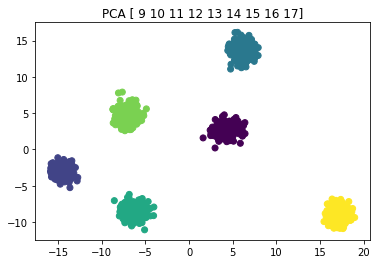

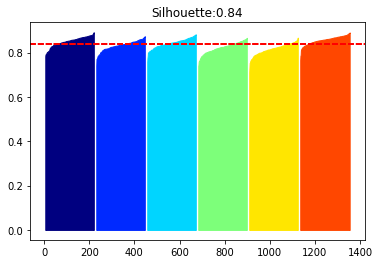

COV 0.2 
ARI  1.0, std 1


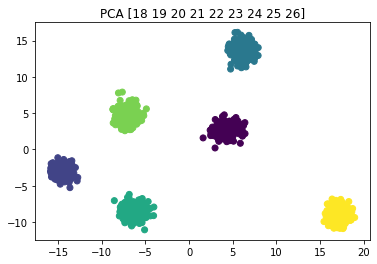

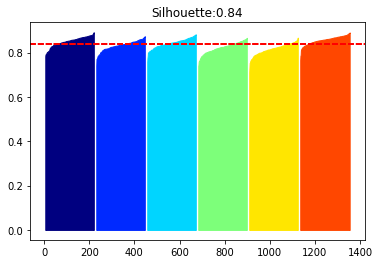

Total: (1300, 332), uniform (1300, 150) , normal (1300, 150),neg bin (1300, 0), gamma (1300, 0), moon (1300, 2), circle (1300, 2),  bimodal (1300, 0), redundat (1300, 5), outliers with uniform (1300, 0), outliers with normal (1300, 0) ,outlier binomial (1300, 0), beta features (1300, 0), 
*** Computing 1D feature ranking ...
Dispersion tests took 0.5 sec


  0%|          | 0/21 [00:00<?, ?it/s]

Entropy computation 0.42 sec
KNN computation 0.02 sec
Sorting and thresholds 0.02 sec
Performing hierarchical clustering...
Hierarchical clustering 0.05 sec
Handle redundant features 0.01 sec
Returning 1 redundant features and  15 important features
*** Optimization algorithm 
Non redundant features 331, orig size 332, nb imp : 15
adding 50 random population


 19%|█▉        | 4/21 [00:41<02:50, 10.02s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.27,"[4, 13, 22, 121]","[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, ...",0.34,0.340563,0.62,4.0,"Counter({0: 868, 1: 432})"


adding 16 random population


 38%|███▊      | 8/21 [01:47<03:12, 14.77s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.27,"[4, 13, 22, 121]","[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, ...",0.34,0.340563,0.62,4.0,"Counter({0: 868, 1: 432})"
1,0.26,"[8, 17, 26, 210]","[0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...",0.38,0.325301,0.72,4.0,"Counter({1: 864, 0: 436})"


adding 24 random population


 57%|█████▋    | 12/21 [02:57<02:09, 14.36s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.27,"[4, 13, 22, 121]","[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, ...",0.34,0.340563,0.62,4.0,"Counter({0: 868, 1: 432})"
1,0.26,"[8, 17, 26, 210]","[0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...",0.38,0.325301,0.72,4.0,"Counter({1: 864, 0: 436})"
2,0.25,"[7, 16, 25]","[2, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0, ...",0.47,0.328837,0.84,3.0,"Counter({0: 648, 2: 436, 1: 216})"


adding 35 random population


 76%|███████▌  | 16/21 [03:52<01:05, 13.08s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.27,"[4, 13, 22, 121]","[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, ...",0.34,0.340563,0.62,4.0,"Counter({0: 868, 1: 432})"
1,0.26,"[8, 17, 26, 210]","[0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...",0.38,0.325301,0.72,4.0,"Counter({1: 864, 0: 436})"
2,0.25,"[7, 16, 25]","[2, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0, ...",0.47,0.328837,0.84,3.0,"Counter({0: 648, 2: 436, 1: 216})"
3,0.27,"[6, 15, 24, 96, 331]","[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, ...",0.31,0.328051,0.57,5.0,"Counter({1: 868, 0: 432})"


adding 39 random population


 95%|█████████▌| 20/21 [04:47<00:12, 12.79s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.27,"[4, 13, 22, 121]","[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, ...",0.34,0.340563,0.62,4.0,"Counter({0: 868, 1: 432})"
1,0.26,"[8, 17, 26, 210]","[0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...",0.38,0.325301,0.72,4.0,"Counter({1: 864, 0: 436})"
2,0.25,"[7, 16, 25]","[2, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0, ...",0.47,0.328837,0.84,3.0,"Counter({0: 648, 2: 436, 1: 216})"
3,0.27,"[6, 15, 24, 96, 331]","[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, ...",0.31,0.328051,0.57,5.0,"Counter({1: 868, 0: 432})"
4,0.24,"[2, 11, 20]","[1, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, ...",0.35,0.317996,0.80,3.0,"Counter({2: 648, 0: 432, 1: 220})"


adding 44 random population


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 331, orig size 332, nb imp : 15
['ARCHIVE2D', 'CLOSE', 'IMP1D', 'RANDOM'] [50 25 15 10] [0.5, 0.25, 0.15, 0.1]
adding 50 random population


 19%|█▉        | 4/21 [00:58<04:13, 14.88s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.26,"[1, 10, 19]","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.31,0.7,3.0,"Counter({1: 1080, 0: 220})"


adding 7 random population


 38%|███▊      | 8/21 [01:53<02:56, 13.61s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.26,"[1, 10, 19]","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.31,0.70,3.0,"Counter({1: 1080, 0: 220})"
1,0.25,"[7, 16, 25]","[2, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0, ...",0.47,0.84,3.0,"Counter({0: 648, 2: 436, 1: 216})"


adding 11 random population


 57%|█████▋    | 12/21 [03:01<02:23, 15.93s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.26,"[1, 10, 19]","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.31,0.70,3.0,"Counter({1: 1080, 0: 220})"
1,0.25,"[7, 16, 25]","[2, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0, ...",0.47,0.84,3.0,"Counter({0: 648, 2: 436, 1: 216})"
2,0.27,"[4, 13, 22, 86]","[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, ...",0.34,0.62,4.0,"Counter({0: 868, 1: 432})"


adding 21 random population


 76%|███████▌  | 16/21 [04:27<01:38, 19.63s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.26,"[1, 10, 19]","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.31,0.70,3.0,"Counter({1: 1080, 0: 220})"
1,0.25,"[7, 16, 25]","[2, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0, ...",0.47,0.84,3.0,"Counter({0: 648, 2: 436, 1: 216})"
2,0.27,"[4, 13, 22, 86]","[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, ...",0.34,0.62,4.0,"Counter({0: 868, 1: 432})"
3,0.27,"[6, 15, 24, 43, 331]","[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, ...",0.31,0.57,5.0,"Counter({1: 868, 0: 432})"


adding 18 random population


 95%|█████████▌| 20/21 [06:37<00:27, 27.29s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.26,"[1, 10, 19]","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.31,0.70,3.0,"Counter({1: 1080, 0: 220})"
1,0.25,"[7, 16, 25]","[2, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0, ...",0.47,0.84,3.0,"Counter({0: 648, 2: 436, 1: 216})"
2,0.27,"[4, 13, 22, 86]","[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, ...",0.34,0.62,4.0,"Counter({0: 868, 1: 432})"
3,0.27,"[6, 15, 24, 43, 331]","[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, ...",0.31,0.57,5.0,"Counter({1: 868, 0: 432})"
4,0.26,"[8, 17, 26, 257]","[0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...",0.38,0.72,4.0,"Counter({1: 864, 0: 436})"


adding 22 random population


100%|██████████| 21/21 [07:19<00:00, 20.92s/it]


,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.26,"[1, 10, 19]","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.31,0.70,3.0,"Counter({1: 1080, 0: 220})"
1,0.25,"[7, 16, 25]","[2, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0, ...",0.47,0.84,3.0,"Counter({0: 648, 2: 436, 1: 216})"
2,0.27,"[4, 13, 22, 86]","[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, ...",0.34,0.62,4.0,"Counter({0: 868, 1: 432})"
3,0.27,"[6, 15, 24, 43, 331]","[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, ...",0.31,0.57,5.0,"Counter({1: 868, 0: 432})"
4,0.26,"[8, 17, 26, 257]","[0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...",0.38,0.72,4.0,"Counter({1: 864, 0: 436})"


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 331, orig size 332, nb imp : 15
adding 50 random population


 19%|█▉        | 4/21 [01:31<06:15, 22.06s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.15,"[2, 3, 6, 7, 11, 15, 16, 17, 20, 23, 24, 26]","[2, 0, 5, 4, 3, 3, 3, 5, 1, 0, 4, 4, 3, 1, 5, ...",0.51,0.86,12.0,"Counter({2: 220, 0: 216, 5: 216, 4: 216, 3: 21..."


adding 36 random population


 38%|███▊      | 8/21 [03:37<05:56, 27.45s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.15,"[2, 3, 6, 7, 11, 15, 16, 17, 20, 23, 24, 26]","[2, 0, 5, 4, 3, 3, 3, 5, 1, 0, 4, 4, 3, 1, 5, ...",0.51,0.86,12.0,"Counter({2: 220, 0: 216, 5: 216, 4: 216, 3: 21..."
1,0.24,"[4, 9, 13, 22]","[2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 1, 2, 0, 2, ...",0.41,0.78,4.0,"Counter({2: 868, 1: 216, 0: 216})"


adding 41 random population


 57%|█████▋    | 12/21 [06:07<05:12, 34.69s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.15,"[2, 3, 6, 7, 11, 15, 16, 17, 20, 23, 24, 26]","[2, 0, 5, 4, 3, 3, 3, 5, 1, 0, 4, 4, 3, 1, 5, ...",0.51,0.86,12.0,"Counter({2: 220, 0: 216, 5: 216, 4: 216, 3: 21..."
1,0.24,"[4, 9, 13, 22]","[2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 1, 2, 0, 2, ...",0.41,0.78,4.0,"Counter({2: 868, 1: 216, 0: 216})"
2,0.17,"[1, 5, 8, 14, 19, 25, 331]","[2, 0, 4, 4, 3, 3, 3, 4, 1, 0, 4, 4, 3, 1, 4, ...",0.40,0.82,7.0,"Counter({4: 432, 2: 220, 0: 216, 3: 216, 1: 216})"


adding 50 random population


 76%|███████▌  | 16/21 [08:14<02:24, 28.92s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.15,"[2, 3, 6, 7, 11, 15, 16, 17, 20, 23, 24, 26]","[2, 0, 5, 4, 3, 3, 3, 5, 1, 0, 4, 4, 3, 1, 5, ...",0.51,0.86,12.0,"Counter({2: 220, 0: 216, 5: 216, 4: 216, 3: 21..."
1,0.24,"[4, 9, 13, 22]","[2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 1, 2, 0, 2, ...",0.41,0.78,4.0,"Counter({2: 868, 1: 216, 0: 216})"
2,0.17,"[1, 5, 8, 14, 19, 25, 331]","[2, 0, 4, 4, 3, 3, 3, 4, 1, 0, 4, 4, 3, 1, 4, ...",0.40,0.82,7.0,"Counter({4: 432, 2: 220, 0: 216, 3: 216, 1: 216})"
3,0.13,"[0, 18]","[2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0, 0, 2, 1, 2, ...",0.18,0.51,2.0,"Counter({2: 861, 0: 214, 1: 212, -1: 13})"


adding 31 random population


 95%|█████████▌| 20/21 [10:59<00:36, 36.83s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.15,"[2, 3, 6, 7, 11, 15, 16, 17, 20, 23, 24, 26]","[2, 0, 5, 4, 3, 3, 3, 5, 1, 0, 4, 4, 3, 1, 5, ...",0.51,0.86,12.0,"Counter({2: 220, 0: 216, 5: 216, 4: 216, 3: 21..."
1,0.24,"[4, 9, 13, 22]","[2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 1, 2, 0, 2, ...",0.41,0.78,4.0,"Counter({2: 868, 1: 216, 0: 216})"
2,0.17,"[1, 5, 8, 14, 19, 25, 331]","[2, 0, 4, 4, 3, 3, 3, 4, 1, 0, 4, 4, 3, 1, 4, ...",0.40,0.82,7.0,"Counter({4: 432, 2: 220, 0: 216, 3: 216, 1: 216})"
3,0.13,"[0, 18]","[2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0, 0, 2, 1, 2, ...",0.18,0.51,2.0,"Counter({2: 861, 0: 214, 1: 212, -1: 13})"
4,0.08,"[10, 218]","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.13,0.53,2.0,"Counter({1: 1071, 0: 215, -1: 14})"


adding 50 random population


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 331, orig size 332, nb imp : 15
adding 50 random population


 19%|█▉        | 4/21 [02:17<09:14, 32.63s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.16,0.803421,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1, 2, 4, 3, 5, 5, 5, 4, 0, 2, 3, 3, 5, 0, 4, ...",0.72,0.83,28.0,"Counter({1: 220, 2: 216, 4: 216, 3: 216, 5: 21..."


adding 50 random population


 38%|███▊      | 8/21 [05:56<09:16, 42.80s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.16,0.803421,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1, 2, 4, 3, 5, 5, 5, 4, 0, 2, 3, 3, 5, 0, 4, ...",0.72,0.83,28.0,"Counter({1: 220, 2: 216, 4: 216, 3: 216, 5: 21..."
1,0.01,0.158513,"[221, 268, 330]","[1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1,...",-0.11,0.21,3.0,"Counter({1: 1097, -1: 191, 0: 12})"


adding 2 random population


 57%|█████▋    | 12/21 [08:42<05:33, 37.09s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.16,0.803421,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1, 2, 4, 3, 5, 5, 5, 4, 0, 2, 3, 3, 5, 0, 4, ...",0.72,0.83,28.0,"Counter({1: 220, 2: 216, 4: 216, 3: 216, 5: 21..."
1,0.01,0.158513,"[221, 268, 330]","[1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1,...",-0.11,0.21,3.0,"Counter({1: 1097, -1: 191, 0: 12})"
2,0.00,0.026212,"[229, 312]","[0, -1, 0, -1, -1, 0, 0, 0, -1, -1, 0, 0, 0, -...",-0.10,0.04,2.0,"Counter({0: 877, -1: 412, 1: 11})"


adding 1 random population


 76%|███████▌  | 16/21 [10:44<02:40, 32.15s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.16,0.803421,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1, 2, 4, 3, 5, 5, 5, 4, 0, 2, 3, 3, 5, 0, 4, ...",0.72,0.83,28.0,"Counter({1: 220, 2: 216, 4: 216, 3: 216, 5: 21..."
1,0.01,0.158513,"[221, 268, 330]","[1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1,...",-0.11,0.21,3.0,"Counter({1: 1097, -1: 191, 0: 12})"
2,0.00,0.026212,"[229, 312]","[0, -1, 0, -1, -1, 0, 0, 0, -1, -1, 0, 0, 0, -...",-0.10,0.04,2.0,"Counter({0: 877, -1: 412, 1: 11})"
3,0.00,0.024427,"[200, 208]","[-1, 1, 1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -...",-0.08,0.04,2.0,"Counter({1: 795, -1: 489, 0: 16})"


adding 4 random population


 95%|█████████▌| 20/21 [13:11<00:32, 32.49s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.16,0.803421,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1, 2, 4, 3, 5, 5, 5, 4, 0, 2, 3, 3, 5, 0, 4, ...",0.72,0.83,28.0,"Counter({1: 220, 2: 216, 4: 216, 3: 216, 5: 21..."
1,0.01,0.158513,"[221, 268, 330]","[1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1,...",-0.11,0.21,3.0,"Counter({1: 1097, -1: 191, 0: 12})"
2,0.00,0.026212,"[229, 312]","[0, -1, 0, -1, -1, 0, 0, 0, -1, -1, 0, 0, 0, -...",-0.10,0.04,2.0,"Counter({0: 877, -1: 412, 1: 11})"
3,0.00,0.024427,"[200, 208]","[-1, 1, 1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -...",-0.08,0.04,2.0,"Counter({1: 795, -1: 489, 0: 16})"
4,0.02,0.023146,"[27, 28]","[1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1...",-0.18,0.03,2.0,"Counter({1: 1091, -1: 174, 0: 35})"


adding 21 random population


100%|██████████| 21/21 [13:48<00:00, 39.43s/it]


>> EVAL DF


,experiment,true_subspace_id,pred_subspace_id,%intersect,iou,extra_features,true_subspace,pred_subspace,missed_features,ari,nmi,true_nb_clust,pred_nb_clust
0,hdbscan_ratkowsky_lance_6_pop2,0,0,0.111111,0.083333,3,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[4, 13, 22, 121]","[0, 1, 2, 3, 5, 6, 7, 8]",0.274447,0.523824,6,2
1,hdbscan_ratkowsky_lance_6_pop2,0,1,0.111111,0.083333,3,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[8, 17, 26, 210]","[0, 1, 2, 3, 4, 5, 6, 7]",0.276415,0.525115,6,2
2,hdbscan_ratkowsky_lance_6_pop2,0,2,0.111111,0.090909,2,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[7, 16, 25]","[0, 1, 2, 3, 4, 5, 6, 8]",0.477833,0.721740,6,3
3,hdbscan_ratkowsky_lance_6_pop2,0,3,0.111111,0.076923,4,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[6, 15, 24, 96, 331]","[0, 1, 2, 3, 4, 5, 7, 8]",0.274447,0.523824,6,2
4,hdbscan_ratkowsky_lance_6_pop2,0,4,0.111111,0.090909,2,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[2, 11, 20]","[0, 1, 3, 4, 5, 6, 7, 8]",0.479402,0.722706,6,3
5,hdbscan_ratkowsky_lance_6_pop2,1,0,0.111111,0.083333,3,"[9, 10, 11, 12, 13, 14, 15, 16, 17]","[4, 13, 22, 121]","[9, 10, 11, 12, 14, 15, 16, 17]",0.274447,0.523824,6,2
6,hdbscan_ratkowsky_lance_6_pop2,1,1,0.111111,0.083333,3,"[9, 10, 11, 12, 13, 14, 15, 16, 17]","[8, 17, 26, 210]","[9, 10, 11, 12, 13, 14, 15, 16]",0.276415,0.525115,6,2
7,hdbscan_ratkowsky_lance_6_pop2,1,2,0.111111,0.090909,2,"[9, 10, 11, 12, 13, 14, 15, 16, 17]","[7, 16, 25]","[9, 10, 11, 12, 13, 14, 15, 17]",0.477833,0.721740,6,3
8,hdbscan_ratkowsky_lance_6_pop2,1,3,0.111111,0.076923,4,"[9, 10, 11, 12, 13, 14, 15, 16, 17]","[6, 15, 24, 96, 331]","[9, 10, 11, 12, 13, 14, 16, 17]",0.274447,0.523824,6,2
9,hdbscan_ratkowsky_lance_6_pop2,1,4,0.111111,0.090909,2,"[9, 10, 11, 12, 13, 14, 15, 16, 17]","[2, 11, 20]","[9, 10, 12, 13, 14, 15, 16, 17]",0.479402,0.722706,6,3


COV 0.2 
ARI  1.0, std 1


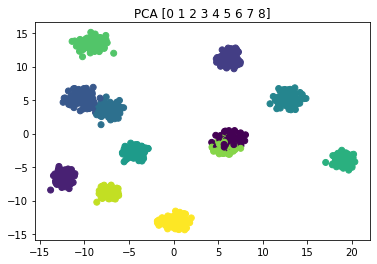

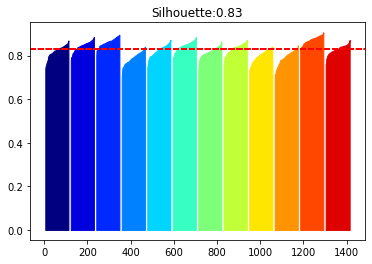

COV 0.2 
ARI  1.0, std 1


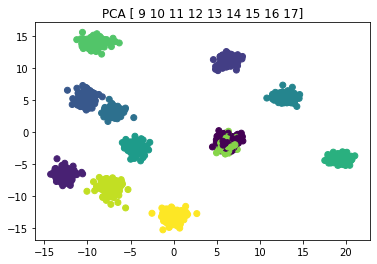

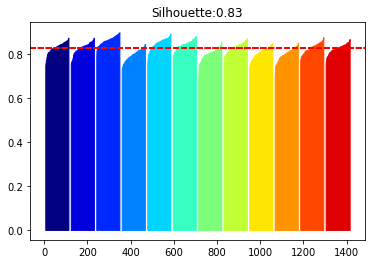

COV 0.2 
ARI  1.0, std 1


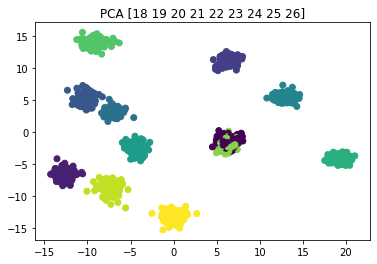

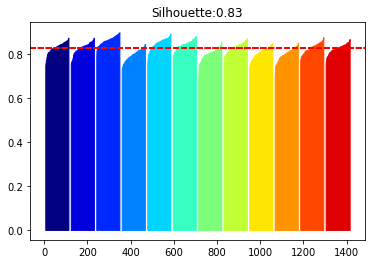

Total: (1300, 332), uniform (1300, 150) , normal (1300, 150),neg bin (1300, 0), gamma (1300, 0), moon (1300, 2), circle (1300, 2),  bimodal (1300, 0), redundat (1300, 5), outliers with uniform (1300, 0), outliers with normal (1300, 0) ,outlier binomial (1300, 0), beta features (1300, 0), 
*** Computing 1D feature ranking ...
Dispersion tests took 0.47 sec


  0%|          | 0/21 [00:00<?, ?it/s]

Entropy computation 0.55 sec
KNN computation 0.02 sec
Sorting and thresholds 0.02 sec
Performing hierarchical clustering...
Hierarchical clustering 0.08 sec
Handle redundant features 0.03 sec
Returning 0 redundant features and  13 important features
*** Optimization algorithm 
Non redundant features 332, orig size 332, nb imp : 13
adding 50 random population


 19%|█▉        | 4/21 [01:02<04:19, 15.26s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.32,"[1, 10, 19]","[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.34,0.430589,0.77,3.0,"Counter({1: 868, 0: 432})"


adding 8 random population


 38%|███▊      | 8/21 [02:16<03:37, 16.75s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.32,"[1, 10, 19]","[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.34,0.430589,0.77,3.0,"Counter({1: 868, 0: 432})"
1,0.23,"[5, 7, 14, 16, 25, 64, 172]","[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, ...",0.32,0.257767,0.46,7.0,"Counter({1: 652, 0: 648})"


adding 29 random population


 57%|█████▋    | 12/21 [03:37<02:38, 17.58s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.32,"[1, 10, 19]","[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.34,0.430589,0.77,3.0,"Counter({1: 868, 0: 432})"
1,0.23,"[5, 7, 14, 16, 25, 64, 172]","[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, ...",0.32,0.257767,0.46,7.0,"Counter({1: 652, 0: 648})"
2,0.25,"[4, 13, 22, 171]","[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, ...",0.27,0.308897,0.56,4.0,"Counter({1: 972, 0: 328})"


adding 21 random population


 76%|███████▌  | 16/21 [04:47<01:24, 16.81s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.32,"[1, 10, 19]","[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.34,0.430589,0.77,3.0,"Counter({1: 868, 0: 432})"
1,0.23,"[5, 7, 14, 16, 25, 64, 172]","[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, ...",0.32,0.257767,0.46,7.0,"Counter({1: 652, 0: 648})"
2,0.25,"[4, 13, 22, 171]","[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, ...",0.27,0.308897,0.56,4.0,"Counter({1: 972, 0: 328})"
3,0.21,"[6, 15, 23, 24, 32, 178, 329]","[1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, ...",0.30,0.240746,0.47,7.0,"Counter({0: 652, 1: 648})"


adding 47 random population


 95%|█████████▌| 20/21 [05:59<00:16, 16.62s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,ratkowsky_lance,silhouette,size,structure
0,0.32,"[1, 10, 19]","[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.34,0.430589,0.77,3.0,"Counter({1: 868, 0: 432})"
1,0.23,"[5, 7, 14, 16, 25, 64, 172]","[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, ...",0.32,0.257767,0.46,7.0,"Counter({1: 652, 0: 648})"
2,0.25,"[4, 13, 22, 171]","[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, ...",0.27,0.308897,0.56,4.0,"Counter({1: 972, 0: 328})"
3,0.21,"[6, 15, 23, 24, 32, 178, 329]","[1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, ...",0.30,0.240746,0.47,7.0,"Counter({0: 652, 1: 648})"
4,0.17,"[2, 3, 12, 21, 89]","[0, 0, 2, 0, 0, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, ...",0.19,0.202973,0.36,5.0,"Counter({2: 540, 0: 432, 1: 328})"


adding 43 random population


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 332, orig size 332, nb imp : 13
['ARCHIVE2D', 'CLOSE', 'IMP1D', 'RANDOM'] [50 25 15 10] [0.5, 0.25, 0.15, 0.1]
adding 50 random population


 19%|█▉        | 4/21 [00:38<02:37,  9.29s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.23,"[5, 7, 14, 16, 25, 99, 268]","[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, ...",0.34,0.51,7.0,"Counter({1: 652, 0: 648})"


adding 28 random population


 38%|███▊      | 8/21 [01:29<02:21, 10.92s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.23,"[5, 7, 14, 16, 25, 99, 268]","[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, ...",0.34,0.51,7.0,"Counter({1: 652, 0: 648})"
1,0.18,"[6, 15, 23, 27, 78, 329]","[1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, ...",0.23,0.38,6.0,"Counter({0: 652, 1: 648})"


adding 22 random population


 57%|█████▋    | 12/21 [02:19<01:40, 11.21s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.23,"[5, 7, 14, 16, 25, 99, 268]","[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, ...",0.34,0.51,7.0,"Counter({1: 652, 0: 648})"
1,0.18,"[6, 15, 23, 27, 78, 329]","[1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, ...",0.23,0.38,6.0,"Counter({0: 652, 1: 648})"
2,0.32,"[1, 10, 19]","[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.34,0.77,3.0,"Counter({1: 868, 0: 432})"


adding 32 random population


 76%|███████▌  | 16/21 [03:06<00:54, 10.97s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.23,"[5, 7, 14, 16, 25, 99, 268]","[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, ...",0.34,0.51,7.0,"Counter({1: 652, 0: 648})"
1,0.18,"[6, 15, 23, 27, 78, 329]","[1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, ...",0.23,0.38,6.0,"Counter({0: 652, 1: 648})"
2,0.32,"[1, 10, 19]","[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.34,0.77,3.0,"Counter({1: 868, 0: 432})"
3,0.25,"[4, 13, 22, 70]","[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, ...",0.27,0.55,4.0,"Counter({1: 972, 0: 328})"


adding 39 random population


 95%|█████████▌| 20/21 [03:49<00:10, 10.61s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.23,"[5, 7, 14, 16, 25, 99, 268]","[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, ...",0.34,0.51,7.0,"Counter({1: 652, 0: 648})"
1,0.18,"[6, 15, 23, 27, 78, 329]","[1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, ...",0.23,0.38,6.0,"Counter({0: 652, 1: 648})"
2,0.32,"[1, 10, 19]","[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.34,0.77,3.0,"Counter({1: 868, 0: 432})"
3,0.25,"[4, 13, 22, 70]","[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, ...",0.27,0.55,4.0,"Counter({1: 972, 0: 328})"
4,0.13,"[3, 12, 21, 191, 267]","[0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...",0.23,0.50,5.0,"Counter({1: 865, 0: 431, -1: 4})"


adding 28 random population


100%|██████████| 21/21 [04:04<00:00, 11.67s/it]


,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.23,"[5, 7, 14, 16, 25, 99, 268]","[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, ...",0.34,0.51,7.0,"Counter({1: 652, 0: 648})"
1,0.18,"[6, 15, 23, 27, 78, 329]","[1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, ...",0.23,0.38,6.0,"Counter({0: 652, 1: 648})"
2,0.32,"[1, 10, 19]","[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.34,0.77,3.0,"Counter({1: 868, 0: 432})"
3,0.25,"[4, 13, 22, 70]","[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, ...",0.27,0.55,4.0,"Counter({1: 972, 0: 328})"
4,0.13,"[3, 12, 21, 191, 267]","[0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...",0.23,0.50,5.0,"Counter({1: 865, 0: 431, -1: 4})"


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 332, orig size 332, nb imp : 13
adding 50 random population


 19%|█▉        | 4/21 [01:12<04:59, 17.62s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.25,"[7, 16, 25]","[0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0, ...",0.41,0.84,3.0,"Counter({0: 648, 1: 328, 2: 324})"


adding 34 random population


 38%|███▊      | 8/21 [02:34<03:59, 18.41s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.25,"[7, 16, 25]","[0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0, ...",0.41,0.84,3.0,"Counter({0: 648, 1: 328, 2: 324})"
1,0.08,"[0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 1...","[4, 5, 10, 5, 9, 3, 11, 8, 3, 3, 4, 0, 0, 10, ...",0.43,0.80,23.0,"Counter({8: 112, 4: 108, 5: 108, 10: 108, 9: 1..."


adding 50 random population


 57%|█████▋    | 12/21 [04:22<03:14, 21.57s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.25,"[7, 16, 25]","[0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0, ...",0.41,0.84,3.0,"Counter({0: 648, 1: 328, 2: 324})"
1,0.08,"[0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 1...","[4, 5, 10, 5, 9, 3, 11, 8, 3, 3, 4, 0, 0, 10, ...",0.43,0.80,23.0,"Counter({8: 112, 4: 108, 5: 108, 10: 108, 9: 1..."
2,0.09,"[24, 205]","[1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, ...",0.14,0.50,2.0,"Counter({1: 724, 0: 541, -1: 35})"


adding 28 random population


 76%|███████▌  | 16/21 [05:42<01:37, 19.41s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.25,"[7, 16, 25]","[0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0, ...",0.41,0.84,3.0,"Counter({0: 648, 1: 328, 2: 324})"
1,0.08,"[0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 1...","[4, 5, 10, 5, 9, 3, 11, 8, 3, 3, 4, 0, 0, 10, ...",0.43,0.80,23.0,"Counter({8: 112, 4: 108, 5: 108, 10: 108, 9: 1..."
2,0.09,"[24, 205]","[1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, ...",0.14,0.50,2.0,"Counter({1: 724, 0: 541, -1: 35})"
3,0.09,"[6, 326]","[1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, ...",0.11,0.46,2.0,"Counter({1: 684, 0: 546, -1: 70})"


adding 50 random population


 95%|█████████▌| 20/21 [07:07<00:19, 19.64s/it]

,adapted_ratkowsky_lance,features,partition,point_biserial,silhouette,size,structure
0,0.25,"[7, 16, 25]","[0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0, ...",0.41,0.84,3.0,"Counter({0: 648, 1: 328, 2: 324})"
1,0.08,"[0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 1...","[4, 5, 10, 5, 9, 3, 11, 8, 3, 3, 4, 0, 0, 10, ...",0.43,0.80,23.0,"Counter({8: 112, 4: 108, 5: 108, 10: 108, 9: 1..."
2,0.09,"[24, 205]","[1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, ...",0.14,0.50,2.0,"Counter({1: 724, 0: 541, -1: 35})"
3,0.09,"[6, 326]","[1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, ...",0.11,0.46,2.0,"Counter({1: 684, 0: 546, -1: 70})"
4,0.01,"[177, 265]","[-1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, ...",-0.10,0.16,2.0,"Counter({1: 1067, -1: 221, 0: 12})"


adding 2 random population


  0%|          | 0/21 [00:00<?, ?it/s]

*** Optimization algorithm 
Non redundant features 332, orig size 332, nb imp : 13
adding 50 random population


 19%|█▉        | 4/21 [01:15<05:12, 18.39s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.08,0.79241,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[5, 10, 9, 10, 6, 3, 8, 2, 3, 3, 5, 1, 1, 9, 8...",0.5,0.82,28.0,"Counter({2: 112, 5: 108, 10: 108, 9: 108, 6: 1..."


adding 50 random population


 38%|███▊      | 8/21 [03:43<05:42, 26.34s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.08,0.792410,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[5, 10, 9, 10, 6, 3, 8, 2, 3, 3, 5, 1, 1, 9, 8...",0.5,0.82,28.0,"Counter({2: 112, 5: 108, 10: 108, 9: 108, 6: 1..."
1,0.00,0.073797,"[263, 300]","[1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1,...",-0.1,0.11,2.0,"Counter({1: 948, -1: 341, 0: 11})"


adding 2 random population


 57%|█████▋    | 12/21 [05:04<03:03, 20.40s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.08,0.792410,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[5, 10, 9, 10, 6, 3, 8, 2, 3, 3, 5, 1, 1, 9, 8...",0.50,0.82,28.0,"Counter({2: 112, 5: 108, 10: 108, 9: 108, 6: 1..."
1,0.00,0.073797,"[263, 300]","[1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1,...",-0.10,0.11,2.0,"Counter({1: 948, -1: 341, 0: 11})"
2,0.00,0.046471,"[212, 237]","[1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1,...",-0.08,0.07,2.0,"Counter({1: 891, -1: 392, 0: 17})"


adding 24 random population


 76%|███████▌  | 16/21 [06:50<02:02, 24.58s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.08,0.792410,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[5, 10, 9, 10, 6, 3, 8, 2, 3, 3, 5, 1, 1, 9, 8...",0.50,0.82,28.0,"Counter({2: 112, 5: 108, 10: 108, 9: 108, 6: 1..."
1,0.00,0.073797,"[263, 300]","[1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1,...",-0.10,0.11,2.0,"Counter({1: 948, -1: 341, 0: 11})"
2,0.00,0.046471,"[212, 237]","[1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1,...",-0.08,0.07,2.0,"Counter({1: 891, -1: 392, 0: 17})"
3,0.05,0.108115,"[78, 320]","[-1, 1, 0, 0, 0, 0, 1, -1, 0, -1, -1, 0, 0, 1,...",-0.05,0.16,2.0,"Counter({0: 635, -1: 390, 1: 275})"


adding 3 random population


 95%|█████████▌| 20/21 [08:19<00:22, 22.02s/it]

,adapted_ratkowsky_lance,adapted_silhouette,features,partition,point_biserial,silhouette,size,structure
0,0.08,0.792410,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[5, 10, 9, 10, 6, 3, 8, 2, 3, 3, 5, 1, 1, 9, 8...",0.50,0.82,28.0,"Counter({2: 112, 5: 108, 10: 108, 9: 108, 6: 1..."
1,0.00,0.073797,"[263, 300]","[1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1,...",-0.10,0.11,2.0,"Counter({1: 948, -1: 341, 0: 11})"
2,0.00,0.046471,"[212, 237]","[1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1,...",-0.08,0.07,2.0,"Counter({1: 891, -1: 392, 0: 17})"
3,0.05,0.108115,"[78, 320]","[-1, 1, 0, 0, 0, 0, 1, -1, 0, -1, -1, 0, 0, 1,...",-0.05,0.16,2.0,"Counter({0: 635, -1: 390, 1: 275})"
4,0.00,0.079664,"[234, 316]","[1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1,...",-0.10,0.12,2.0,"Counter({1: 966, -1: 320, 0: 14})"


adding 3 random population


100%|██████████| 21/21 [08:49<00:00, 25.20s/it]


>> EVAL DF


,experiment,true_subspace_id,pred_subspace_id,%intersect,iou,extra_features,true_subspace,pred_subspace,missed_features,ari,nmi,true_nb_clust,pred_nb_clust
0,hdbscan_ratkowsky_lance_12_pop2,0,1,0.222222,0.142857,5,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[5, 7, 14, 16, 25, 64, 172]","[0, 1, 2, 3, 4, 6, 8]",0.165503,0.436213,12,2
1,hdbscan_ratkowsky_lance_12_pop2,0,4,0.222222,0.166667,3,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[2, 3, 12, 21, 89]","[0, 1, 4, 5, 6, 7, 8]",0.290847,0.605325,12,3
2,hdbscan_ratkowsky_lance_12_pop2,1,1,0.222222,0.142857,5,"[9, 10, 11, 12, 13, 14, 15, 16, 17]","[5, 7, 14, 16, 25, 64, 172]","[9, 10, 11, 12, 13, 15, 17]",0.165503,0.436213,12,2
3,hdbscan_ratkowsky_lance_12_pop2,2,3,0.222222,0.142857,5,"[18, 19, 20, 21, 22, 23, 24, 25, 26]","[6, 15, 23, 24, 32, 178, 329]","[18, 19, 20, 21, 22, 25, 26]",0.165503,0.436213,12,2
4,hdbscan_adapted_ratkowsky_lance_12_pop2,0,0,0.222222,0.142857,5,"[0, 1, 2, 3, 4, 5, 6, 7, 8]","[5, 7, 14, 16, 25, 99, 268]","[0, 1, 2, 3, 4, 6, 8]",0.165503,0.436213,12,2
5,hdbscan_adapted_ratkowsky_lance_12_pop2,1,0,0.222222,0.142857,5,"[9, 10, 11, 12, 13, 14, 15, 16, 17]","[5, 7, 14, 16, 25, 99, 268]","[9, 10, 11, 12, 13, 15, 17]",0.165503,0.436213,12,2
6,hdbscan_adapted_ratkowsky_lance_12_pop2,2,0,0.111111,0.066667,6,"[18, 19, 20, 21, 22, 23, 24, 25, 26]","[5, 7, 14, 16, 25, 99, 268]","[18, 19, 20, 21, 22, 23, 24, 26]",0.165503,0.436213,12,2
7,hdbscan_adapted_ratkowsky_lance_12_pop2,2,1,0.111111,0.071429,5,"[18, 19, 20, 21, 22, 23, 24, 25, 26]","[6, 15, 23, 27, 78, 329]","[18, 19, 20, 21, 22, 24, 25, 26]",0.165503,0.436213,12,2
8,hdbscan_adapted_ratkowsky_lance_12_pop2,2,2,0.111111,0.090909,2,"[18, 19, 20, 21, 22, 23, 24, 25, 26]","[1, 10, 19]","[18, 20, 21, 22, 23, 24, 25, 26]",0.134265,0.407479,12,2
9,hdbscan_adapted_ratkowsky_lance_12_pop2,2,3,0.111111,0.083333,3,"[18, 19, 20, 21, 22, 23, 24, 25, 26]","[4, 13, 22, 70]","[18, 19, 20, 21, 23, 24, 25, 26]",0.103631,0.370433,12,2


In [14]:

for std in [6, 3, 1]:
    print(f">> std {std}")
    n_clusters_per_subpace = [3,6,12]
    cluster_std = None
    n_uniform_features=700
    n_normal_features=700
    n_neg_binomial = 700
    n_gamma = 500
    n_redundant_clusters = 0
    n_redundant_cluster_size = 0
    for n_clusters in np.unique(n_clusters_per_subpace): 
        if os.path.isfile(f"../data/GA/nonisotropic_GA_hdbscan_{std}_{n_clusters}.pkl"):
            continue
        n_redundant_clusters = 0
        n_redundant_cluster_size = 0
        data, best_subspaces, truths = data_generator.make_data_for_ga(
                         [n_clusters, n_clusters, n_clusters],
                         cluster_std=[std, std,std],
                         n_uniform_features=150,
                         n_normal_features=150,
                         n_neg_binomial=0,
                         n_gamma=0,
                         n_beta=0,
                         random_redundant=True,
                         n_redundant=5,
                         n_outlier_features=0,
                         n_cutoff=0,
                         n_bimodal_features=0,
                         min_subspace_features=9,
                         max_subspace_features=10,
                         max_neg_bin_p = 0.3,
                         n_samples=1300,
                         plot=True,
                         isotropic = False)

        imp_f = np.concatenate(best_subspaces)
        data.shape, imp_f, best_subspaces

        truth = None

        clustering ="hdbscan"

        meta_features = feature_ranking.rank_features(data,
                                                      nb_bins=20,
                                                      rank_threshold=90,
                                                      z_file=None,
                                                      metric='euclidean',
                                                      redundant_threshold=0.4)
    
#         model_file = f'../models/gmm_arl.h5' 
#         population2, n = features_2d.run(
#             data,
#             n_clusters,
#             meta_features,
#             model_file=model_file,
#             add_close_population=False,
#             theta=0.09,
#         )

        globalResults = {}

        ############## ratkowsky_lance #######################
        method = "ratkowsky_lance"
        threshold=0.09
        score_tolerance=0.009
        round_size = 4
        debug = False
        ignore_redundant= True
        epochs = 5*round_size


        sampling = {
        "ARCHIVE2D": { 
            "ga": 0,
            "max": 0 },
        "CLOSE": { 
            "ga": 0.35,
            "max": 0.35 },
        "IMP1D": { 
            "ga": 0.35,
            "max": 0.35 },
        "RANDOM": { 
            "ga": 0.3,
            "max": 0.3},
        }
        params = ga.ga_parameters(
            n_clusters,
            data.shape[1],
            truth,
            meta_features,
            method=method,
            truth_methods=['ari'],
            archive_2d=None,
            debug=debug,
            epochs=epochs,
            round_size=round_size,
            sampling = sampling,
            ignore_redundant = ignore_redundant,
            allow_subspace_overlap = False,
            improvement_per_mutation_report = True,
            score_tolerance=score_tolerance,
            clustering = clustering,
            total_maximisation_exploration = 100

        )
        solutions, archive= ga.run(data, params)
        globalResults[f"{clustering}_{method}_{n_clusters}_pop2"] = solutions
        
        ############## adapted_ratkowsky_lance #######################
        method = "adapted_ratkowsky_lance"
        threshold=0.09
        score_tolerance=0.009
        round_size = 4
        debug = False
        ignore_redundant= True
        epochs = 5*round_size


        sampling = {
            "ARCHIVE2D": { 
                "ga": 0.5,
                "max": 0.5 },
            "CLOSE": { 
                "ga": 0.25,
                "max": 0.25 },
            "IMP1D": { 
                "ga": 0.15,
                "max": 0.15 },
            "RANDOM": { 
                "ga": 0.1,
                "max": 0.1},
        }
        params = ga.ga_parameters(
            n_clusters,
            data.shape[1],
            truth,
            meta_features,
            method=method,
            truth_methods=['ari'],
            archive_2d=None,
            debug=debug,
            epochs=epochs,
            round_size=round_size,
            sampling = sampling,
            ignore_redundant = ignore_redundant,
            allow_subspace_overlap = False,
            improvement_per_mutation_report = True,
            score_tolerance=score_tolerance,
            clustering = clustering,
            total_maximisation_exploration = 100

        )
        print(params["sampling_actions"], params["maximisation_sizes"] , params["sampling_prob"])
        params

        solutions, archive= ga.run(data, params)
        display(solutions)
        globalResults[f"{clustering}_{method}_{n_clusters}_pop2"] = solutions

        ############## silhouette #######################
        method = "silhouette"
        threshold=0.1
        score_tolerance=0.01
        round_size = 4
        debug = False
        ignore_redundant= True
        epochs = 5*round_size


        sampling = {
            "ARCHIVE2D": { 
                "ga": 0.5,
                "max": 0.5 },
            "CLOSE": { 
                "ga": 0.25,
                "max": 0.25 },
            "IMP1D": { 
                "ga": 0.15,
                "max": 0.15 },
            "RANDOM": { 
                "ga": 0.1,
                "max": 0.1},
        }
        params = ga.ga_parameters(
            n_clusters,
            data.shape[1],
            truth,
            meta_features,
            method=method,
            truth_methods=['ari'],
            archive_2d=None,
            debug=debug,
            epochs=epochs,
            round_size=round_size,
            sampling = sampling,
            ignore_redundant = ignore_redundant,
            allow_subspace_overlap = False,
            improvement_per_mutation_report = True,
            score_tolerance=score_tolerance,
            clustering = clustering,
            total_maximisation_exploration = 100

        )

        solutions, archive= ga.run(data, params)
        globalResults[f"{clustering}_{method}_{n_clusters}_pop3"] = solutions

        ############## adapted_silhouette #######################
        method = "adapted_silhouette"
        threshold=0.1
        score_tolerance=0.01
        round_size = 4
        debug = False
        ignore_redundant= True
        epochs = 5*round_size


        sampling = {
            "ARCHIVE2D": { 
                "ga": 0.5,
                "max": 0.5 },
            "CLOSE": { 
                "ga": 0.25,
                "max": 0.25 },
            "IMP1D": { 
                "ga": 0.15,
                "max": 0.15 },
            "RANDOM": { 
                "ga": 0.1,
                "max": 0.1},
        }
        params = ga.ga_parameters(
            n_clusters,
            data.shape[1],
            truth,
            meta_features,
            method=method,
            truth_methods=['ari'],
            archive_2d=None,
            debug=debug,
            epochs=epochs,
            round_size=round_size,
            sampling = sampling,
            ignore_redundant = ignore_redundant,
            allow_subspace_overlap = False,
            improvement_per_mutation_report = True,
            score_tolerance=score_tolerance,
            clustering = clustering,
            total_maximisation_exploration = 100

        )

        solutions, archive= ga.run(data, params)
        globalResults[f"{clustering}_{method}_{n_clusters}_pop3"] = solutions
        eval_df = ga_evaluation.evaluate_ga_result(globalResults, best_subspaces, truths)
        eval_df.to_pickle(f"../data/GA/nonisotropic_GA_hdbscan_{std}_{n_clusters}.pkl")
        print(f">> EVAL DF")
        display(eval_df)

In [15]:
df = None
n_clusters_per_subpace = [3,6,12]
# for std in [0.5, 1, 1.5, 2, 3, 4]:
for std in [6, 3, 1]:
    for n_clusters in n_clusters_per_subpace:
        eval_df = pd.read_pickle(f"../data/GA/nonisotropic_GA_hdbscan_{std}_{n_clusters}.pkl")
    #     eval_df = pd.read_pickle(f"../data/GA/GA_hdbscan_{std}_20000.pkl")
        eval_df["std"] = std
        if df is None:
            df = eval_df
        else:
            df = pd.concat([df, eval_df])

In [16]:
df.experiment.unique()

array(['hdbscan_ratkowsky_lance_3_pop2',
       'hdbscan_adapted_ratkowsky_lance_3_pop2',
       'hdbscan_silhouette_3_pop3', 'hdbscan_adapted_silhouette_3_pop3',
       'hdbscan_ratkowsky_lance_6_pop2',
       'hdbscan_adapted_ratkowsky_lance_6_pop2',
       'hdbscan_silhouette_6_pop3', 'hdbscan_adapted_silhouette_6_pop3',
       'hdbscan_ratkowsky_lance_12_pop2',
       'hdbscan_adapted_ratkowsky_lance_12_pop2',
       'hdbscan_silhouette_12_pop3', 'hdbscan_adapted_silhouette_12_pop3'],
      dtype=object)

In [19]:


columns={
            'Adapted Ratkowsky Lance': "Penalized\nRatkowski Lance",
            'Adapted Silhouette': "Penalized\nSilhouette",
            
        }
df["experiment"] = df["experiment"].apply(
    lambda l: " ".join(x.title() for x in l.split("_")[1:-2]))

df = df.rename(columns = {"ari": "ARI", "%intersect": "% Identified Features", "iou": "IOU",
                         'true_nb_clust' : "Nb Clusters"})
df = df.sort_values(by = "experiment")
# df["experiment"] = df["experiment"].apply(lambda x: columns.get(x, x))

In [20]:
df["experiment"] = df["experiment"].apply(lambda x: columns[x] if x in columns else x)

In [21]:
df.groupby("experiment").mean()[["% Identified Features", "ARI"]].T

experiment,Penalized\nRatkowski Lance,Penalized\nSilhouette,Ratkowsky Lance,Silhouette
% Identified Features,0.229469,0.818930,0.212560,0.356209
ARI,0.308290,0.895252,0.378038,0.756970


In [22]:
df.groupby("experiment").mean()[["% Identified Features", "ARI"]].T.mean()

experiment
Penalized\nRatkowski Lance    0.268880
Penalized\nSilhouette         0.857091
Ratkowsky Lance               0.295299
Silhouette                    0.556590
dtype: float64

In [23]:
df.to_pickle("../data/simulated_hdbscan.pkl")

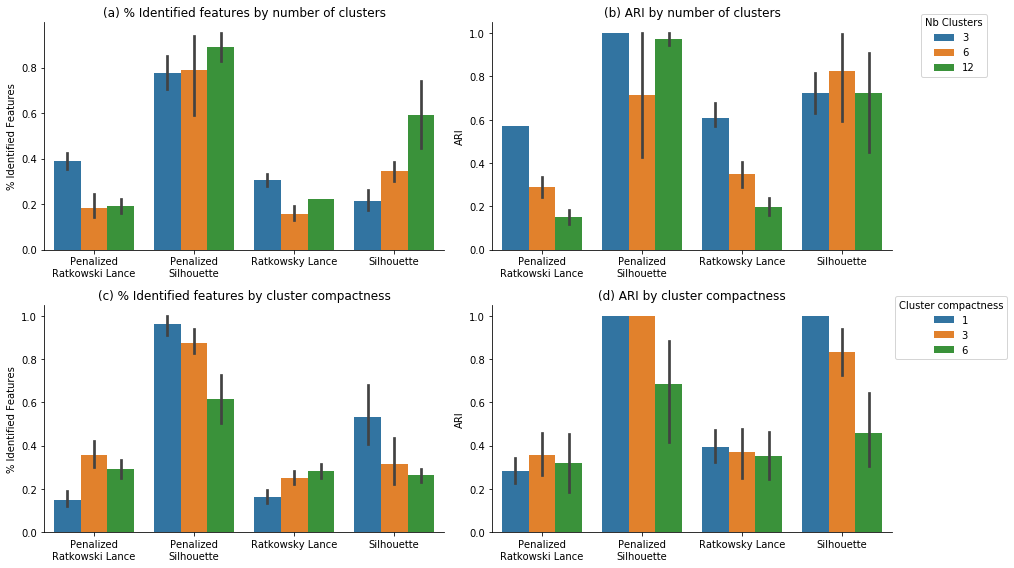

In [24]:
plt.figure(figsize = (14, 8 ))
ax = plt.subplot(221)
g = sns.barplot(x = "experiment" , y = "% Identified Features", data = df, hue = "Nb Clusters", ax = ax)
g.legend_.remove()
plt.title("(a) % Identified features by number of clusters")
plt.xlabel("")
sns.despine()

ax = plt.subplot(222)
g = sns.barplot(x = "experiment" , y = "ARI", data = df, hue = "Nb Clusters", ax = ax)
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.9), ncol=1, title = "Nb Clusters")
plt.xlabel("")
plt.title("(b) ARI by number of clusters")
sns.despine()


ax = plt.subplot(223)
g = sns.barplot(x = "experiment" , y = "% Identified Features", data = df, hue = "std", ax = ax)
g.legend_.remove()
plt.xlabel("")
plt.title("(c) % Identified features by cluster compactness")
sns.despine()

ax = plt.subplot(224)
g = sns.barplot(x = "experiment" , y = "ARI", data = df, hue = "std", ax = ax)
g.legend(loc='center right', bbox_to_anchor=(1.3, 0.9), ncol=1, title = "Cluster compactness")
plt.xlabel("")
plt.title("(d) ARI by cluster compactness")
sns.despine()
plt.tight_layout()
plt.savefig(f"../images/GMM_subspace_clustering.pdf", bbox_inches='tight')

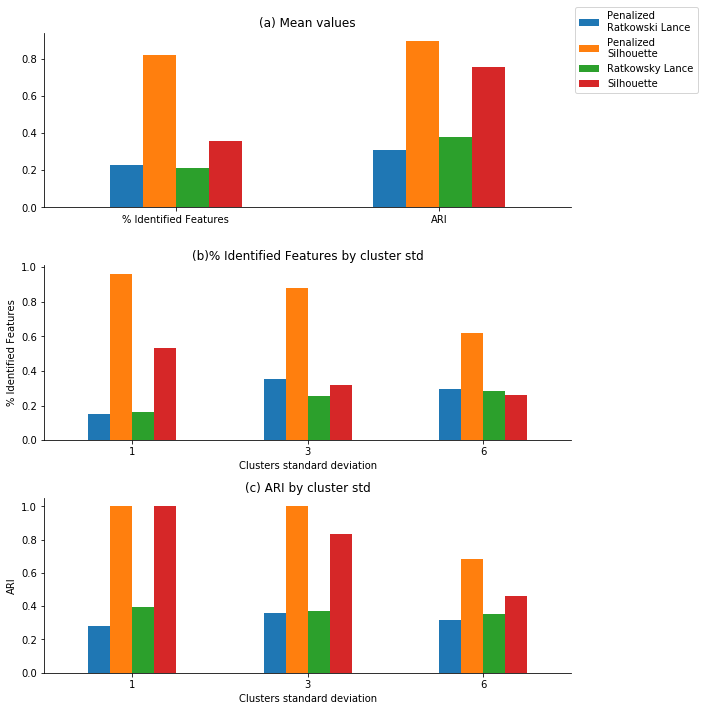

In [25]:
plt.figure(figsize = (10, 10 ))
ax = plt.subplot(311)
g = df.groupby("experiment").mean()[["% Identified Features", "ARI"]].T.plot(kind = "bar", ax = ax)
plt.title("(a) Mean values")
plt.xticks(rotation =0 )
sns.despine()
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.9), ncol=1)


ax = plt.subplot(312)
g = df.groupby(
    ["experiment", "std"]).mean()["% Identified Features"].unstack(1).T.plot(kind="bar", ax = ax)
plt.xticks(rotation =0 )
sns.despine()
g.legend_.remove()
plt.title("(b)% Identified Features by cluster std")
plt.xlabel("Clusters standard deviation")
plt.ylabel("% Identified Features")

ax = plt.subplot(313)
g = df.groupby(
    ["experiment", "std"]).mean()["ARI"].unstack(1).T.plot(kind="bar", ax = ax)
sns.despine()
plt.title("(c) ARI by cluster std")
plt.xlabel("Clusters standard deviation")
plt.ylabel("ARI")

plt.xticks(rotation =0 )
g.legend_.remove()
plt.tight_layout()
# plt.savefig(f"images/ARI_features_internal_scores_small_dataset_GMM.pdf", bbox_inches='tight')